<a href="https://colab.research.google.com/github/tousif99/Mobile-Price-Range-Prediction-Classification-Project/blob/main/Mobile_Price_Range_Prediction_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Name - Mobile Price Range Prediction Classification Project.**

### **Project Type - Classification**

## **Contribution - Team**

**Team Member 1 -** Tousif Sheikh

**Team Member 2 -** Mohammad Sufawan

**Team Member 3 -** Udit kumar

# **Project Summary :**
This data science project aimed to predict mobile phone price ranges based on their specifications using machine learning algorithms. The dataset consisted of various features related to mobile phones such as battery capacity, RAM, internal memory, camera quality, and other hardware specifications. The dataset was split into training and testing sets and several machine learning algorithms such as Logistic Regression, Decision Tree, Random Forest, and Support Vector Machines (SVM) were applied to the training set. The Random Forest algorithm was chosen as the final model due to its high accuracy and F1-score. The project concluded that predictive modeling can be an effective approach for mobile price range detection and highlighted the importance of data preprocessing and feature engineering for improving model accuracy.
GitHub Link :


# **GitHub Link :**
Mohammad Sufawan -https://github.com/sufawan20/Mobile-Price-Range-Prediction-Classification-Project./blob/main/Mobile_Price_Range_Prediction_Classification_Project.ipynb

Tousif sheikh- https://github.com/tousif99/Mobile-Price-Range-Prediction-Classification-Project/blob/main/Mobile_Price_Range_Prediction_Classification_Project.ipynb

### **Problem Statement:**
**In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.**
### **Data Description -**
* **Battery_power** - Total energy a battery can store in one time measured in mAh
* **Blue** - Has bluetooth or not
* ***Clock_speed*** - speed at which microprocessor executes instructions
* ***Dual_sim*** - Has dual sim support or not
* ***Fc*** - Front Camera mega pixels
* ***Four_g*** - Has 4G or not
* ***Int_memory*** - Internal Memory in Gigabytes
* ***M_dep*** - Mobile Depth in cm
* ***Mobile_wt*** - Weight of mobile phone
* ***N_cores*** - Number of cores of processor
* ***Pc*** - Primary Camera mega pixels
* ***Px_height*** - Pixel Resolution Height
* ***Px_width*** - Pixel Resolution Width
* ***Ram*** - Random Access Memory in Mega Bytes
* ***Sc_h*** - Screen Height of mobile in cm
* ***Sc_w*** - Screen Width of mobile in cm
* ***Talk_time*** - longest time that a single battery charge will last when you are
* ***Three_g*** - Has 3G or not
* ***Touch_screen*** - Has touch screen or not
* ***Wifi*** - Has wifi or not
* ***Price_range*** - This is the target variable with value of
* 0(low cost),
* 1(medium cost),
* 2(high cost) and
* 3(very high cost).
* Thus our target variable has 4 categories so basically it is a Multiclass classification problem.

In [ ]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# setting max display column limit to 30
pd.set_option("display.max_columns", 30)

#set style
# plt.style.use('seaborn')
sns.set()


# setting font weight,label weight,title weight to bold and setting title size,label size,fontsize.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

import warnings
warnings.filterwarnings('ignore')

In [ ]:
 # Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# CSV file loaction path
file_path= '/content/drive/MyDrive/Classification Mobile price prediction/data_mobile_price_range.csv'


In [ ]:
# importing csv file into Pandas dataframe.
mobile_data=pd.read_csv(file_path)

In [ ]:
# first 5 rows
mobile_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# Last 5 Rows of the data

mobile_data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [ ]:
# lets Check the shape of data
print(mobile_data.shape)
print(f'Total Rows = {mobile_data.shape[0]}\nTotol Columns={mobile_data.shape[1]} ')

(2000, 21)
Total Rows = 2000
Totol Columns=21 


In [ ]:
# Checking Statistic of the data
mobile_data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


Some Basic Observations:
* We can see that sc_width and px_height has minimum value 0. which is not possible in any mobile. We need to handle this mismatch.

In [ ]:
# Checking How many observations having screen width value as 0.
print(mobile_data[mobile_data['sc_w']==0].shape[0])

180


In [ ]:
# Checking How many observations having px_hieght value as 0.
print(mobile_data[mobile_data['px_height']==0].shape[0])

2


In [ ]:
# As there are only 2 observations having px_height=0. so we will drop it.
mobile_data=mobile_data[mobile_data['px_height']!=0]

## Nearest Neighbors Imputations (KNNImputer)

Missing values are imputed using the k-Nearest Neighbors approach where a Euclidean distance is used to find the nearest neighbors.

Let’s take the above example of the titanic dataset to see how it works.
* Before using KNN Imputer we need to replace 0 with NAN values. so that it will work.

In [ ]:
# Replacing 0 with NAN so that we can implement KNN Imputer.
mobile_data['sc_w']=mobile_data['sc_w'].replace(0,np.nan)

In [ ]:
# import KNN imputer frio sklearn
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=1)
mobile_data=pd.DataFrame(impute_knn.fit_transform(mobile_data),columns=mobile_data.columns)

In [ ]:
# Checking shape
mobile_data.shape

(1998, 21)

In [ ]:
# Checking How many observations having sc_w value as 0.
mobile_data[mobile_data['sc_w']==0].shape[0]

0

**Thus we have handled the mismatched values of the data.**

In [ ]:
# Checking the datatypes, non null values
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1998 non-null   float64
 1   blue           1998 non-null   float64
 2   clock_speed    1998 non-null   float64
 3   dual_sim       1998 non-null   float64
 4   fc             1998 non-null   float64
 5   four_g         1998 non-null   float64
 6   int_memory     1998 non-null   float64
 7   m_dep          1998 non-null   float64
 8   mobile_wt      1998 non-null   float64
 9   n_cores        1998 non-null   float64
 10  pc             1998 non-null   float64
 11  px_height      1998 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1998 non-null   float64
 15  sc_w           1998 non-null   float64
 16  talk_time      1998 non-null   float64
 17  three_g        1998 non-null   float64
 18  touch_sc

* **We don't have any object data type in our data set.**
* **Also we have Zero null values in data set.**
* **Price_range is our target variable.**

In [ ]:
# Checking Null values.
mobile_data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

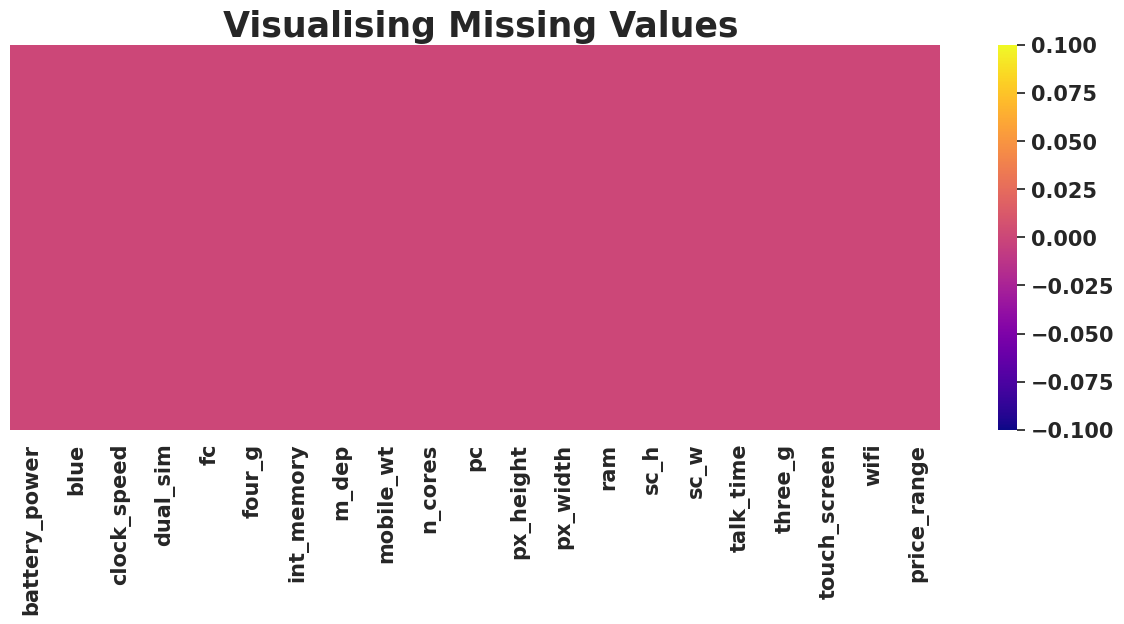

In [ ]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(15,5))
sns.heatmap(mobile_data.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

**No Null values found. Which is good thing for us.**




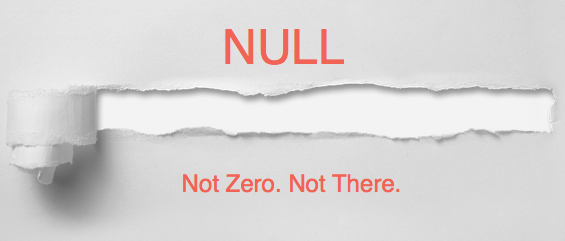

In [ ]:
# Checking Duplicate values in data set.
print(f' We have {mobile_data.duplicated().sum()} duplicate values in dataset.')

 We have 0 duplicate values in dataset.


We have 0 duplicate values in dataset.

# **EDA( Exploratory Data Analysis)**

### **Let's have look at target variable first.!**

In [ ]:
# lets have look at our target variable's counts
price_range_values=mobile_data['price_range'].value_counts()
price_range_values

2.0    500
0.0    500
1.0    499
3.0    499
Name: price_range, dtype: int64

***Wow.!  we have almost equal number of obseravtions for each category. Thus we don't have imbalanced target variable.Accuracy score will be the best evalaution metric for us to select the model.***

***This is the target variable with value of***
* ***0=low cost,***
* ***1=medium cost,***
* ***2=high cost,***
* ***3=very high cost.***

<Axes: ylabel='price_range'>

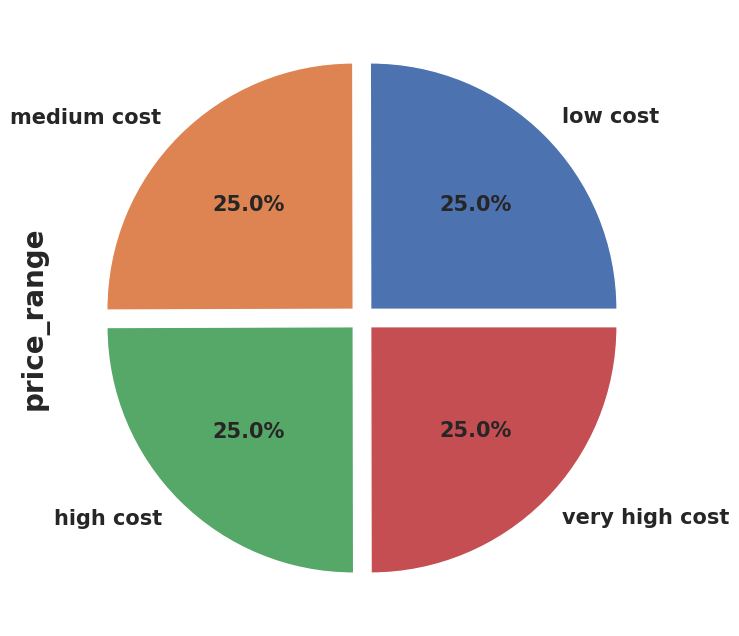

In [ ]:
# Visualizing the Target variable's class distribution.
labels = ["low cost", "medium cost", "high cost", "very high cost"]
price_range_values.plot.pie(explode=[0.05]*4,labels=labels,autopct='%1.1f%%',figsize=(12,8),fontsize=15)    # plotting pie chart


* **We can see that our target varibale is equally distributed.**
* **Thus we don't have to worry about data imbalance and there is no need of oversampling or undersampling.Which is good for us.**



* **We can see that our target varibale is equally distributed.**
* **Thus we don't have to worry about data imbalance and there is no need of oversampling or undersampling.Which is good for us.**



## **Correlation of target varaible i.e Dependent variable with the other independent variable.**

<Axes: >

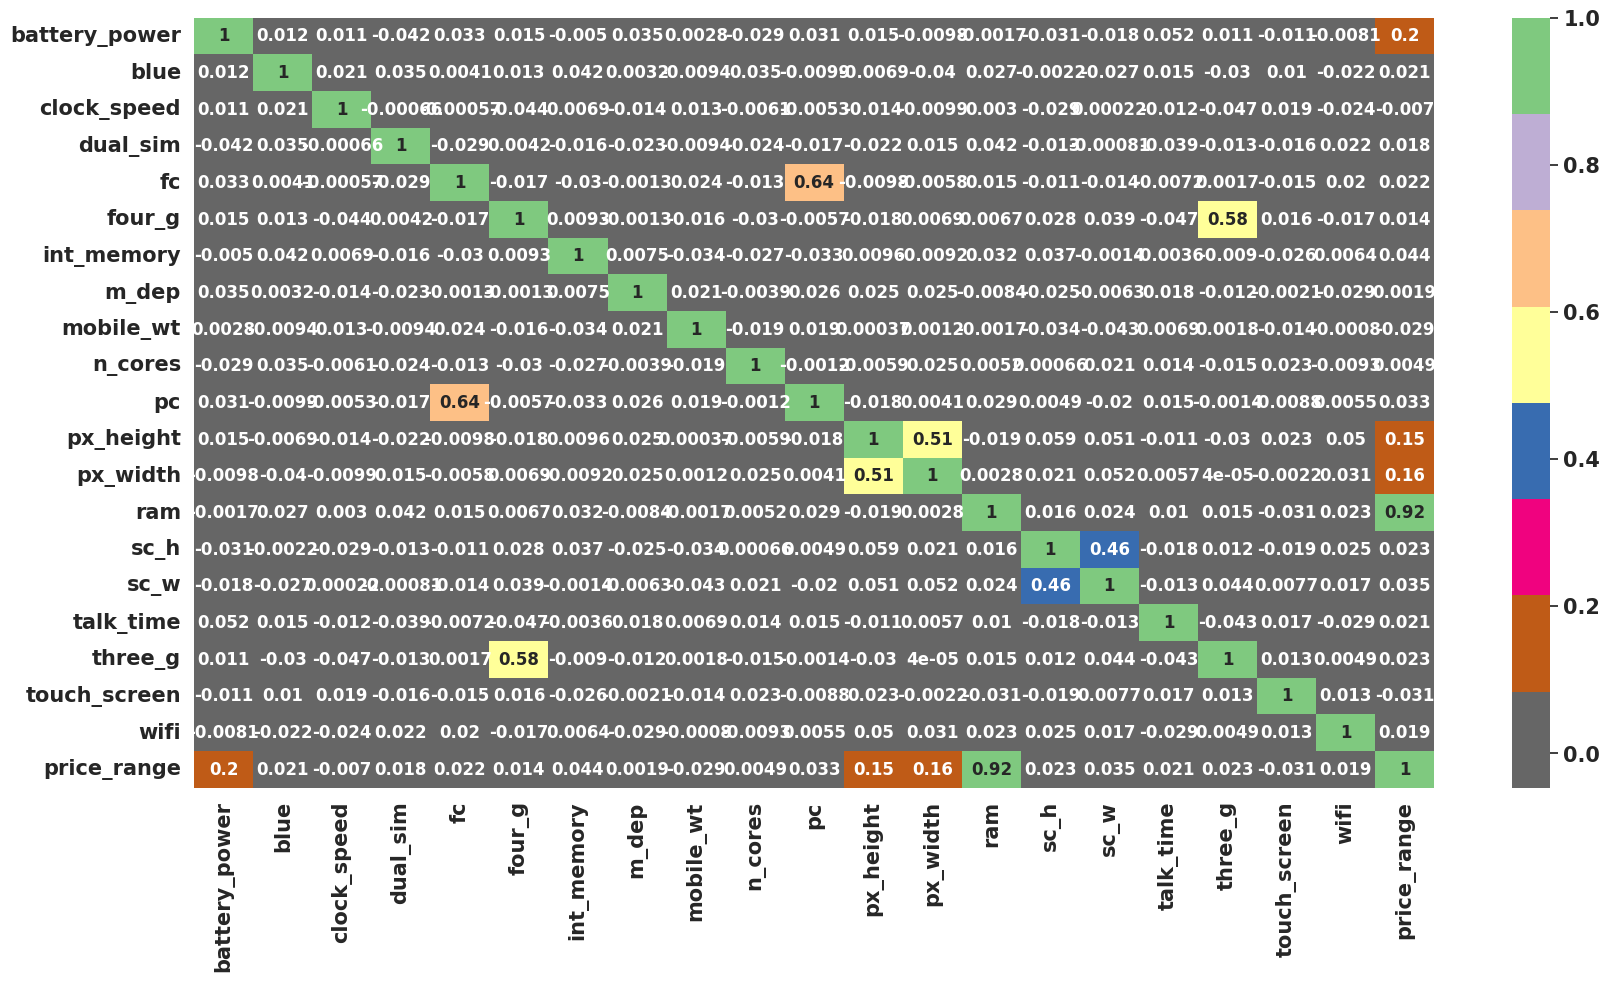

In [ ]:
corr= mobile_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True, cmap=plt.cm.Accent_r)

### **Observations:**
* ***RAM has strong positive correlation with the Price_range. and we know that Mobiles with high RAM are very costly. Thus RAM increases price range also increase.***
* ***Battery_power also has positive correlation with the price range.Generally mobiles having high prices comes with good battery power.***
* ***Also px_height and px_width (Pixel Resolution Height and width) are positively correlated. Generally High price range mobiles have good resolutions.***

* ***Four_g and Three_g are highly positvely correlated. Nowdays most of the smart mobiles has both type of options. This could be the reason that they are correlated.***

* ***primary camera i.e pc and front camera fc are positively correlated.***
* ***sc_h and sc_w are positively correlated.***

In [ ]:
mobile_data.columns


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# **Univariate Analysis of Categorical columns.**

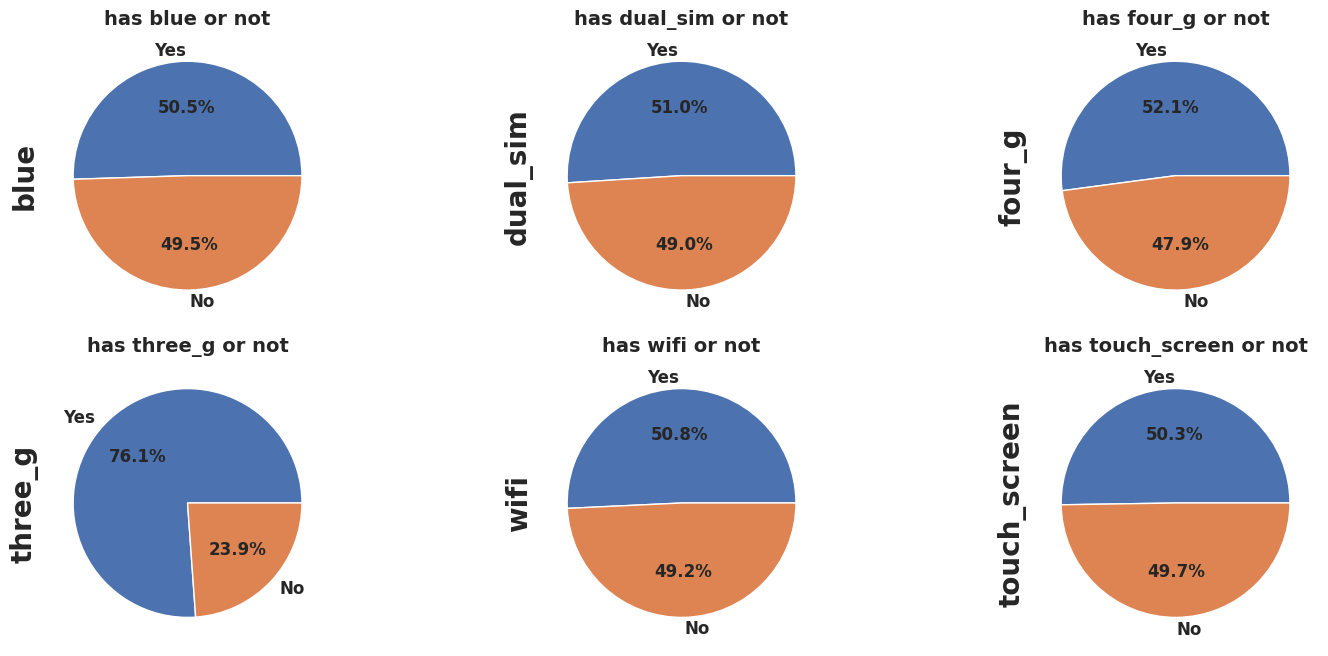

In [ ]:
# Plotting the piecharts for binary categorical variables.
plt.figure(figsize=(15,10))

rows=3
col=3
count=1
var_list=['blue','dual_sim','four_g','three_g','wifi','touch_screen']
labels=['Yes','No']
for var in var_list:
  plt.subplot(rows,col,count)
  mobile_data[var].value_counts().plot.pie(autopct='%1.1f%%',fontsize=12,labels=labels)
  plt.title(f'has {var} or not',fontsize=14)
  plt.tight_layout()
  count=count+1


* ***1 means it has the specifications.***
* ***0 means it do not have the specifications.***
* ***Percentage Distribution of Mobiles having bluetooth,dual sim, 4G,wifi and touchscreen are almost 50 %.***
* ***very few mobiles(23.8%) do not have Three_g.***


## **Relation Between RAM,Battery_power,px_height and px_width**

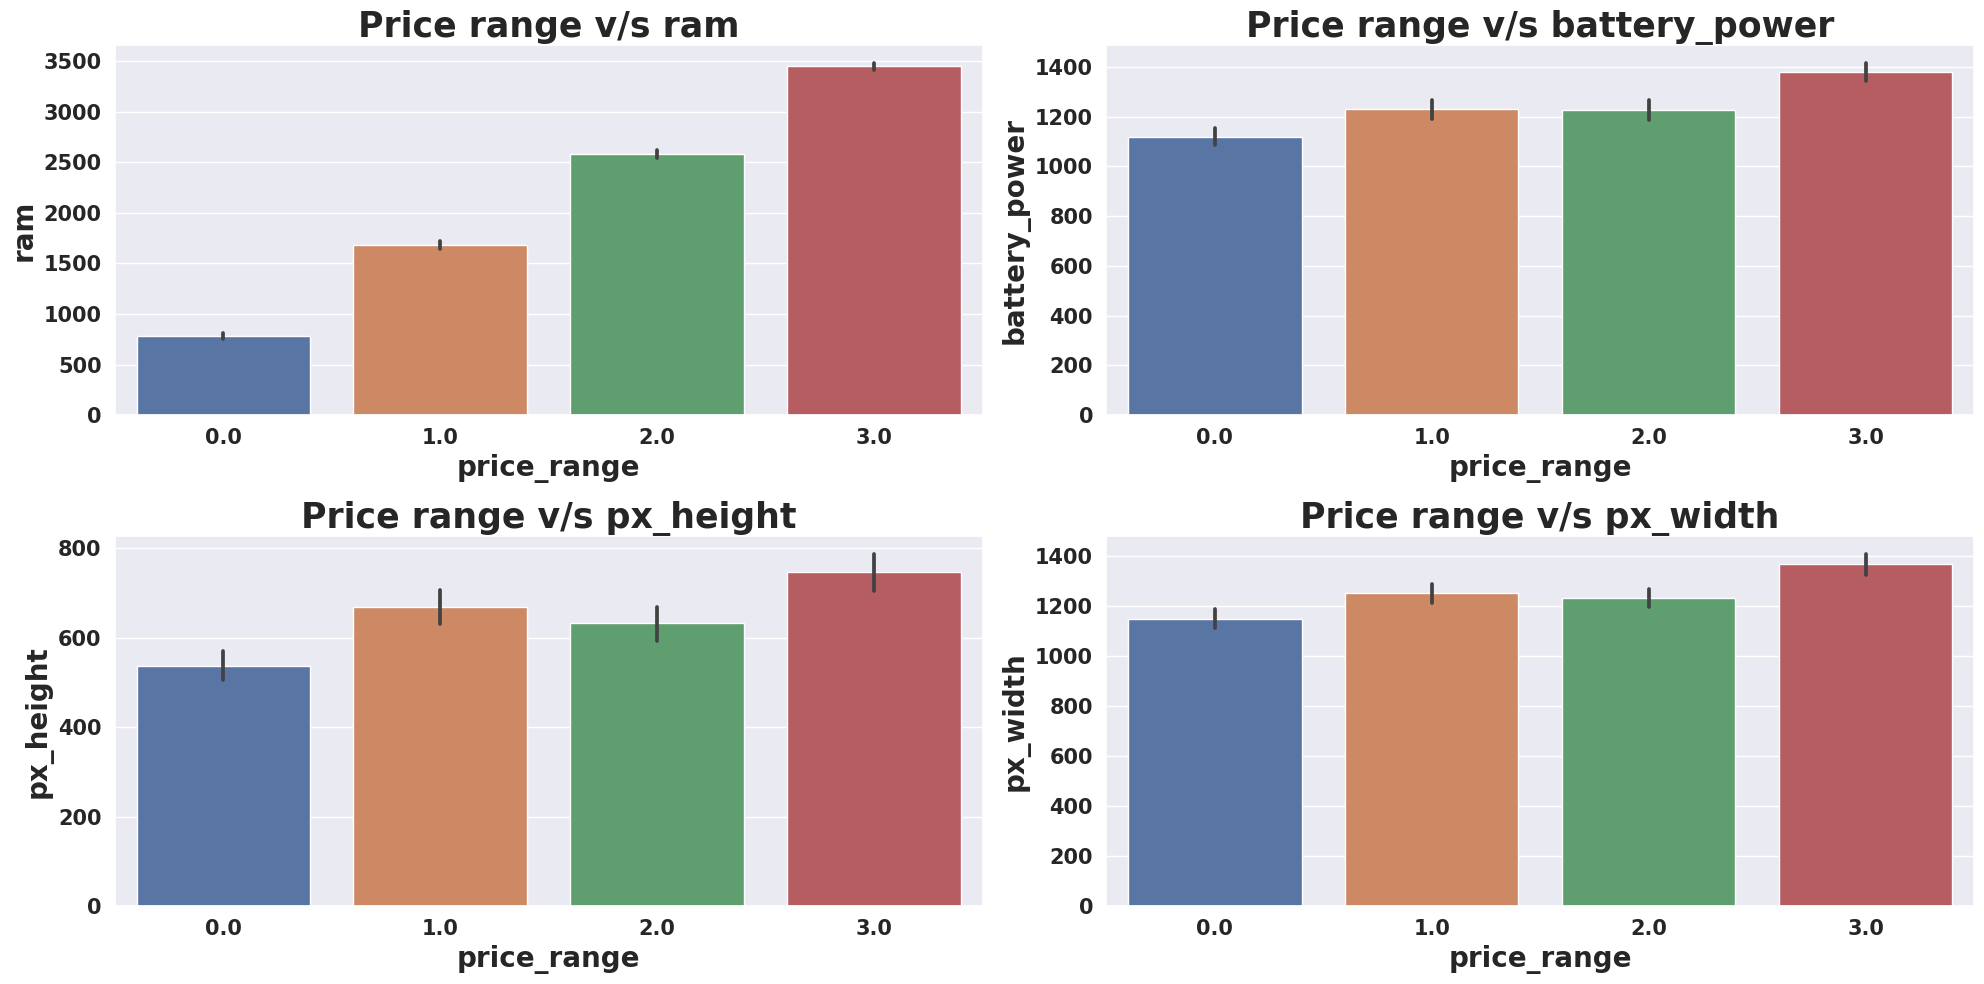

In [ ]:
# plotting  price_range vs other fearures
plt.figure(figsize=(20,10))

labels=['0=low_cost','1=medium_cost','2=high_cost','3=very_high_cost']

rows=2
cols=2
counter=1

variables=['ram','battery_power','px_height','px_width']

for var in variables:
  plt.subplot(rows,cols,counter)
  sns.barplot(x=mobile_data['price_range'],y=mobile_data[var])
  plt.title(f'Price range v/s {var}')
  counter=counter+1
  plt.tight_layout()




### **Observations:**
* ***Mobiles having RAM more than 3000MB falls under Very high cost category.As RAM increases price range also increases.***
* ***Mobiles having RAM less than 1000 MB falls under low cost category.***
* ***Mobiles with battery power more than 1300 mAh has very high cost. And Mobiles with battery power between 1200 and 1300 mAH falls under medium and high cost category.***
* ***Mobiles with more than 700 pixel height and width more than 1300 has very high cost.***

In [ ]:
# Checking the counts of binary categorical variables by grouping price range.
grup_by_price=mobile_data.groupby(['price_range']).agg({'blue':'value_counts','dual_sim':'value_counts','four_g':'value_counts','three_g':'value_counts','touch_screen':'value_counts','wifi':'value_counts'}).unstack()

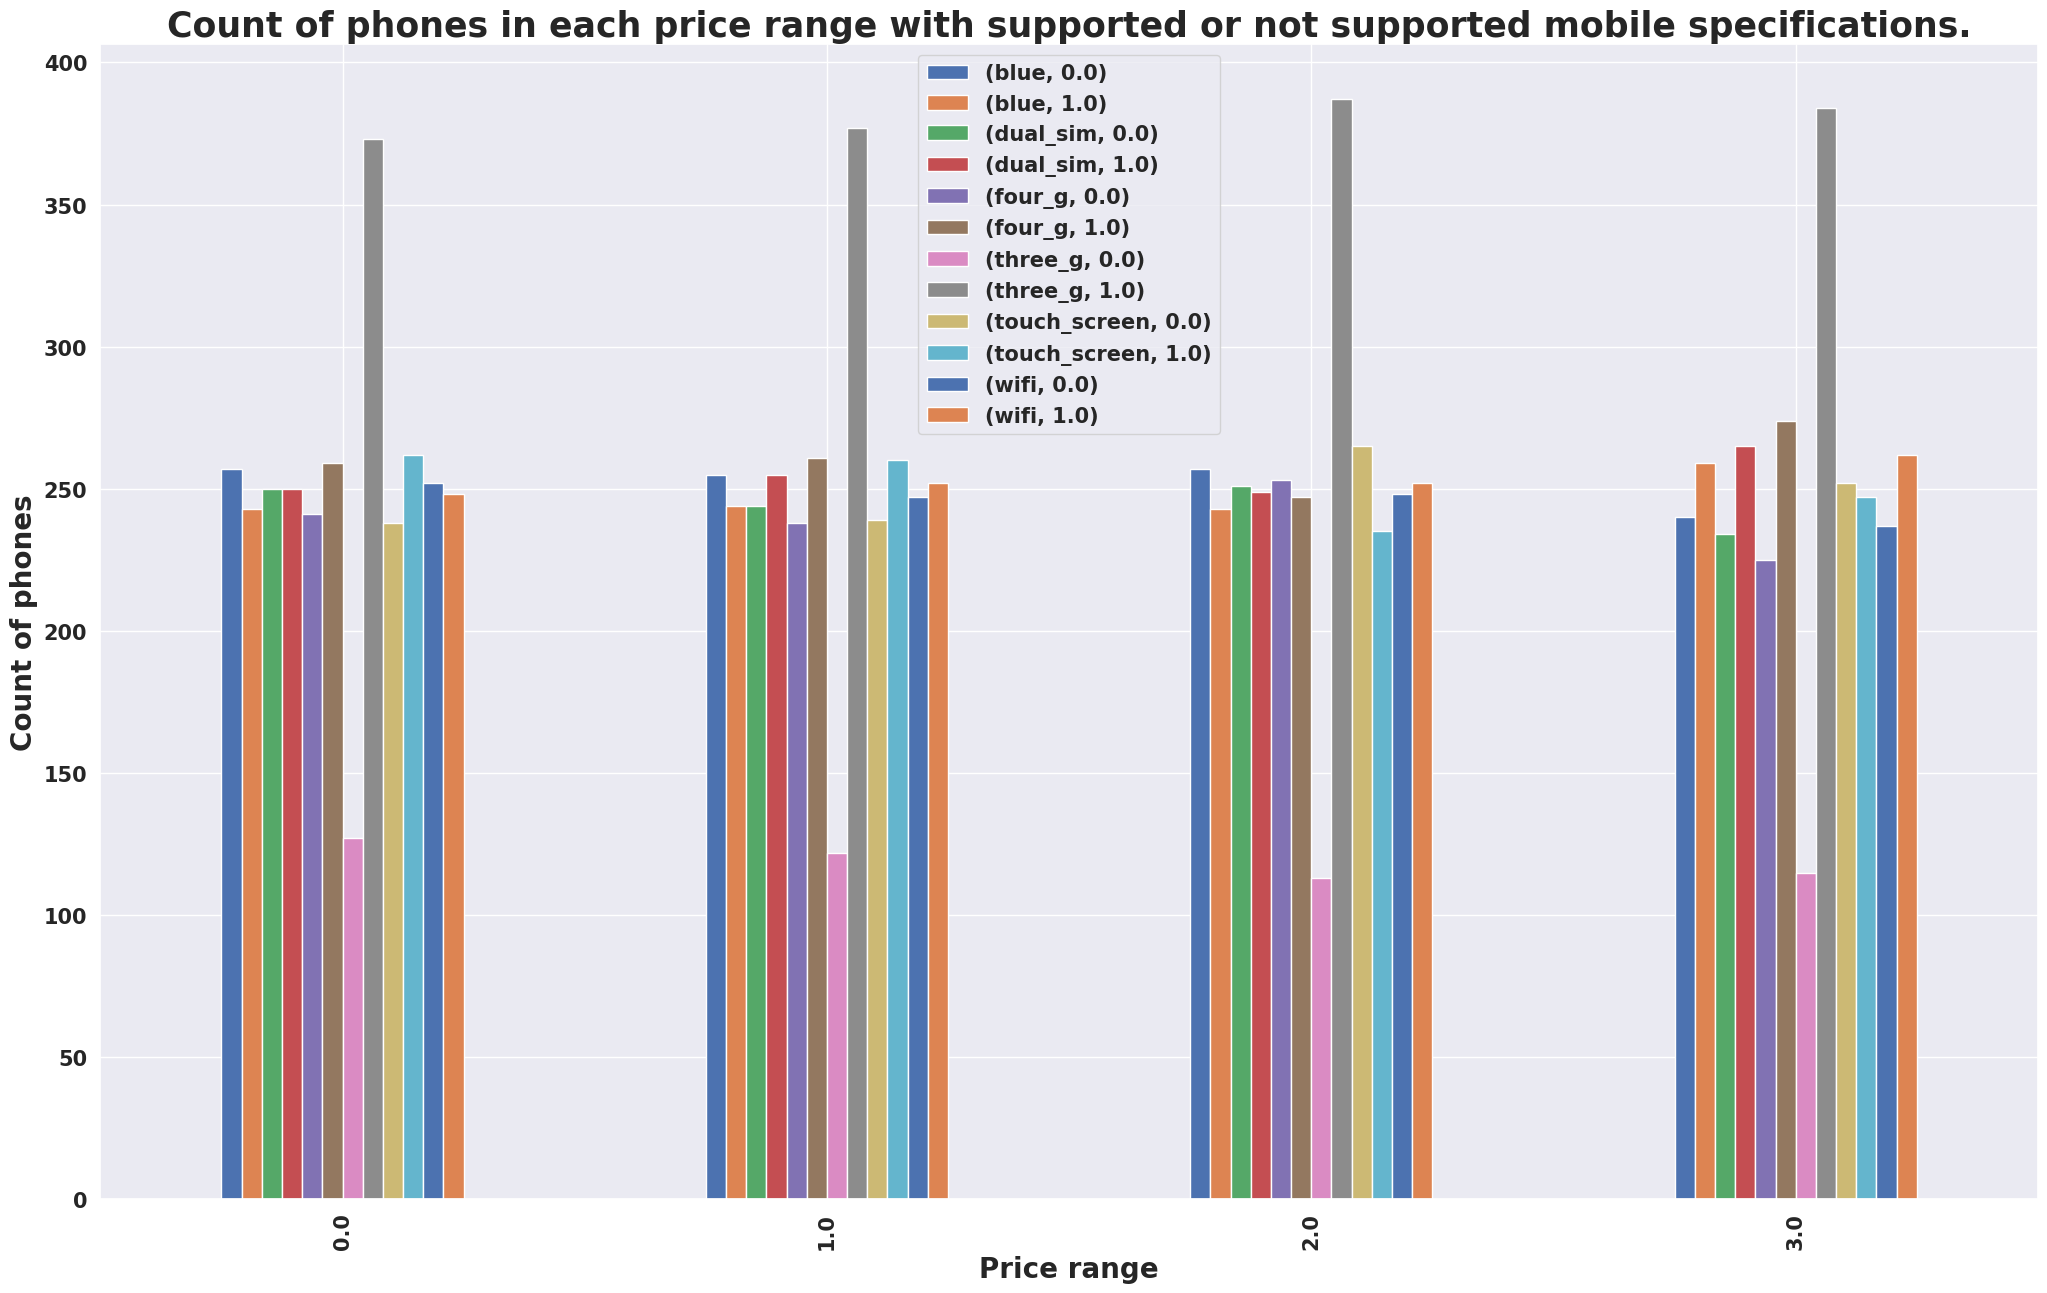

In [ ]:
# visualising by plotting barchat.
# plt.figure(figsize=(12,6))
grup_by_price.plot.bar(figsize=(25,15))
plt.title('Count of phones in each price range with supported or not supported mobile specifications.')
plt.xlabel('Price range')
plt.ylabel('Count of phones')
plt.legend(loc='upper center')

### **Observations**

***We can see that each price range category has equal number of mobiles phones having both supporting and non supporting specifications.***

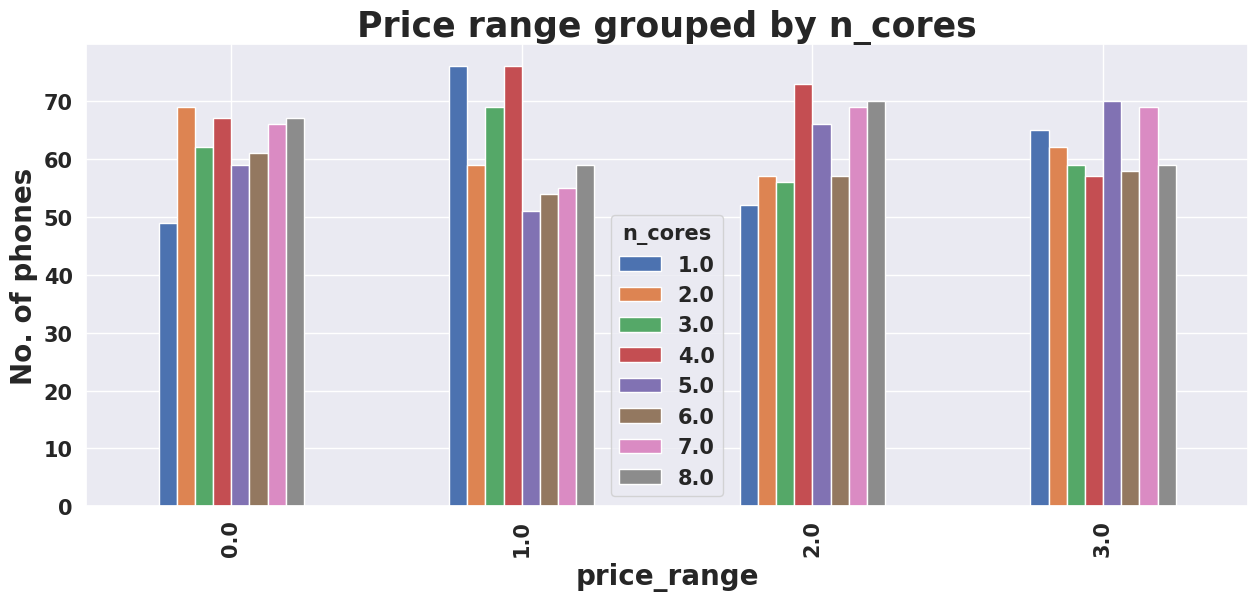

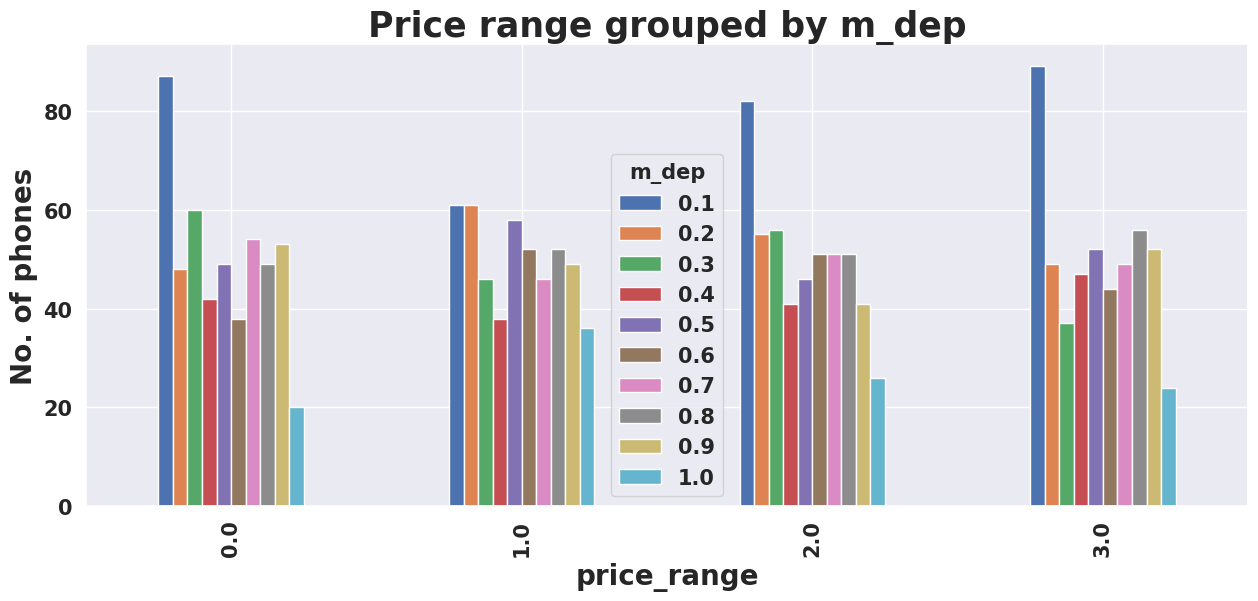

In [ ]:
list_2=['n_cores','m_dep']
for item in list_2:

  mobile_data.groupby(['price_range'])[item].value_counts().unstack().plot.bar(figsize=(15,6))
  plt.title(f'Price range grouped by {item}')
  plt.ylabel('No. of phones')

### **Observation**
* ***There are very few mobiles in price range 0 and 1 with lesser no of cores.***
* ***Most of the mobiles in price range 2 and 3 are with high no of cores.***

* ***Number of phones with less thickness is high and count of phones with high thickness is low.***

#**Let's Check which numerical feature is driving the price range most.**

In [ ]:
mobile_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

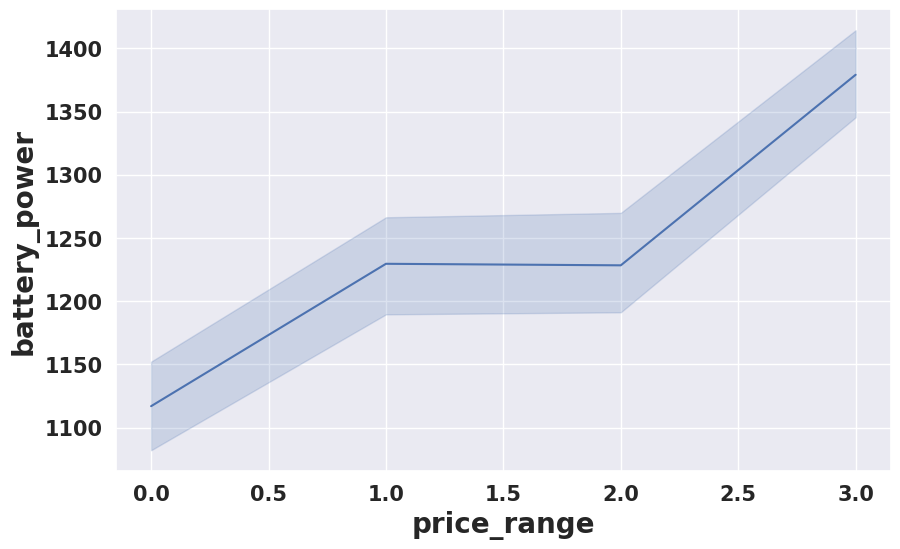

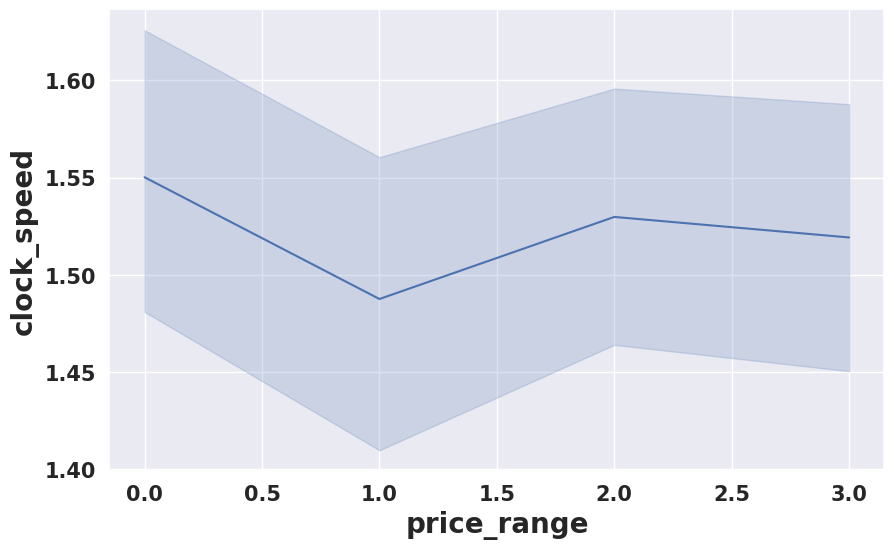

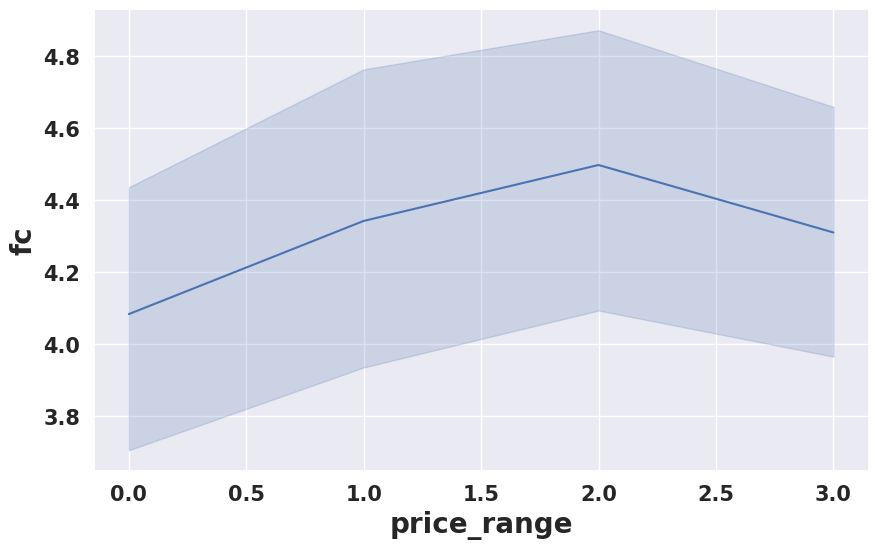

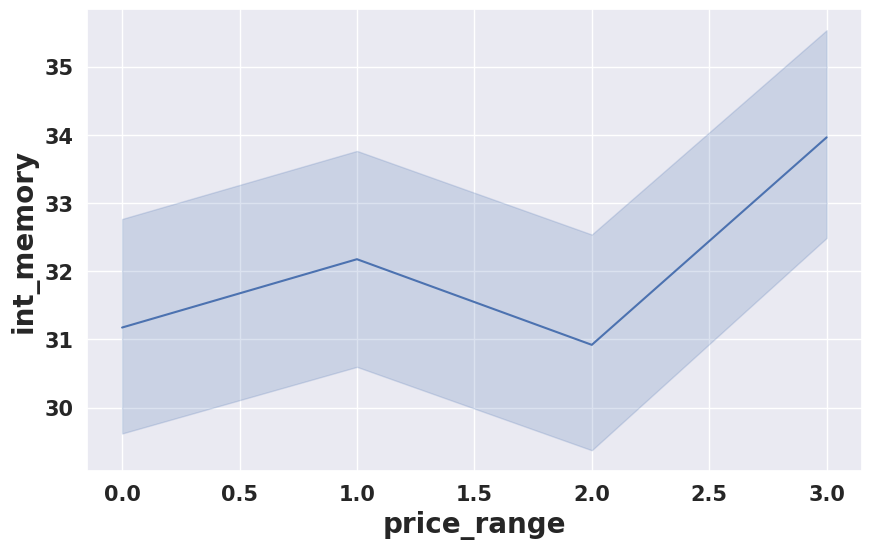

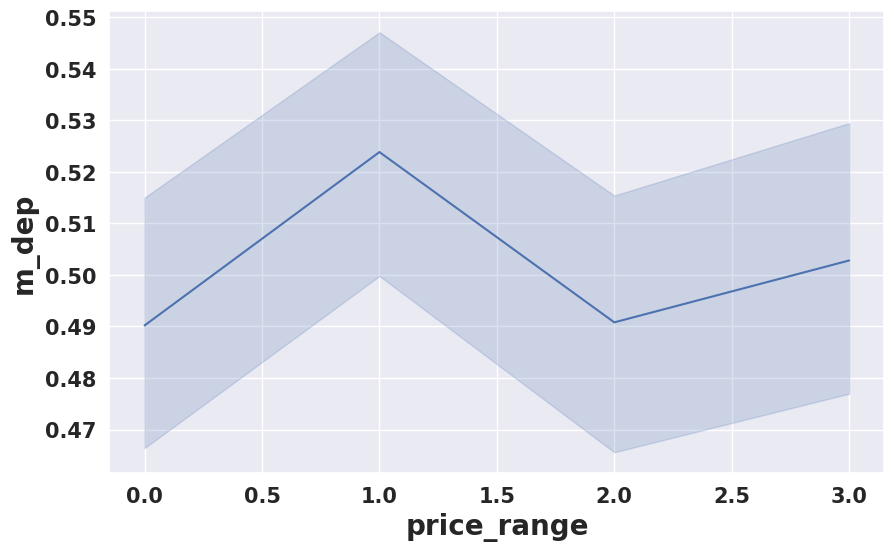

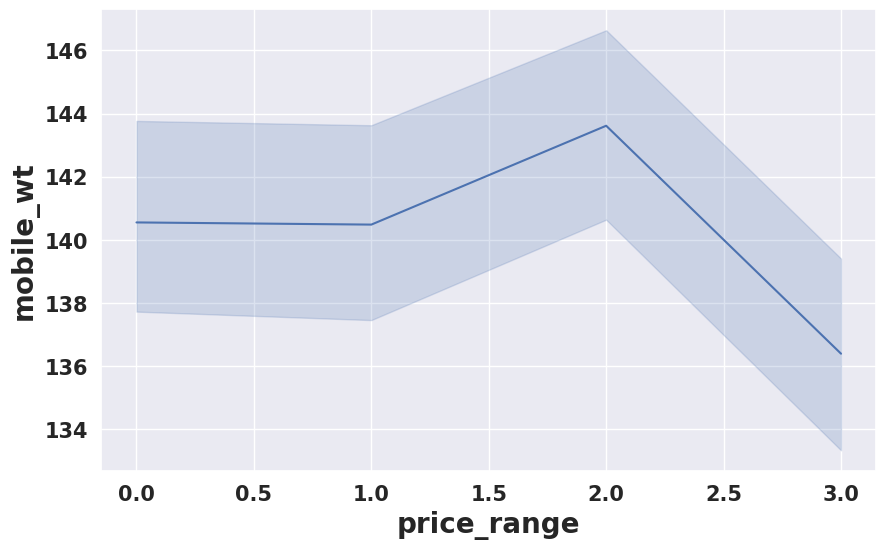

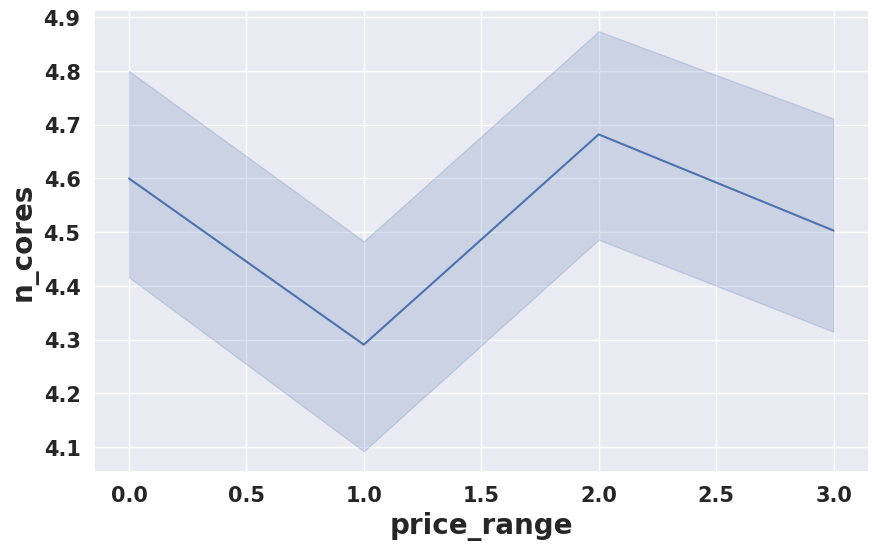

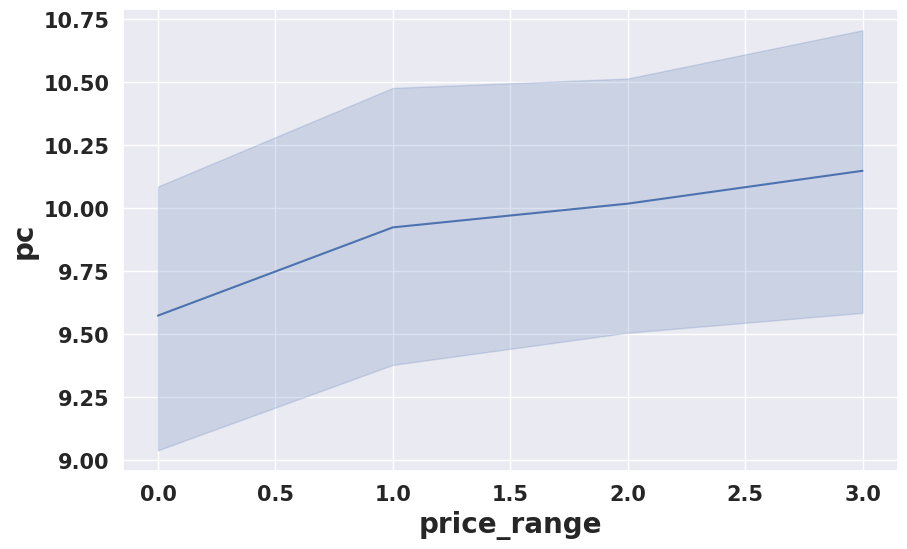

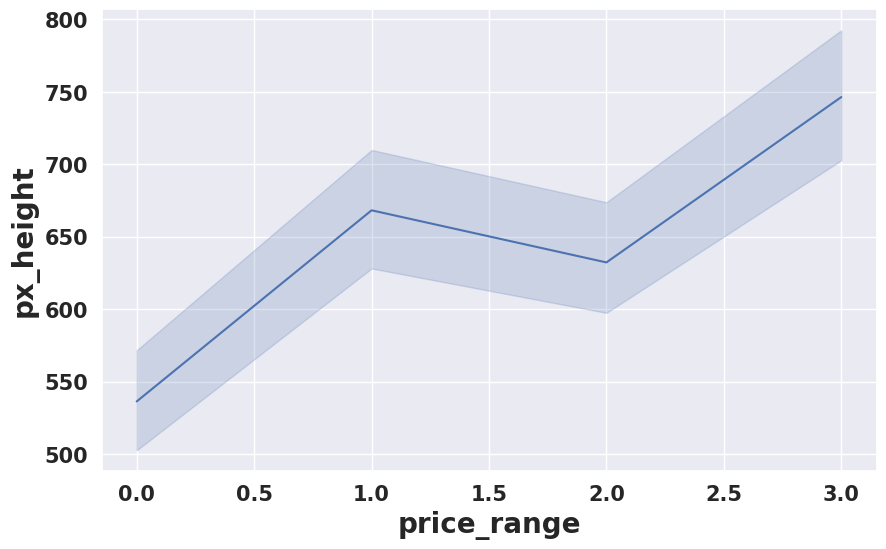

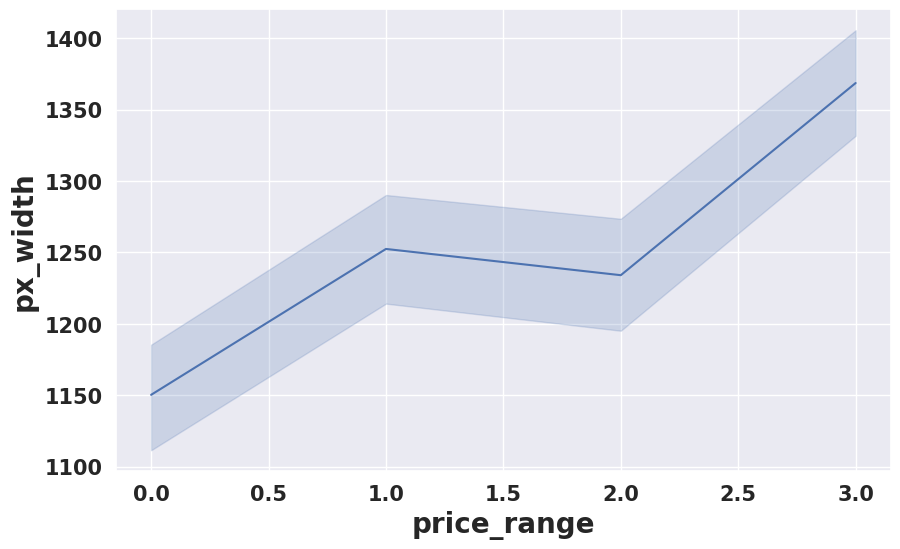

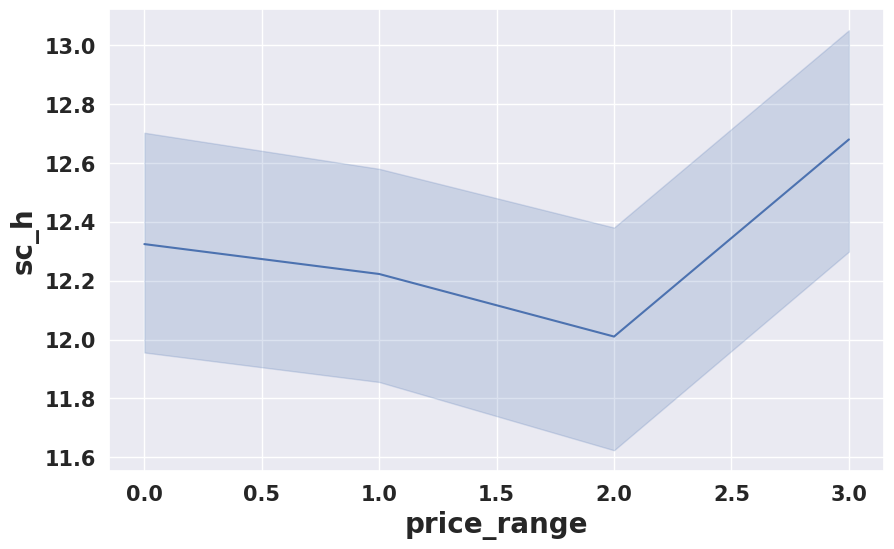

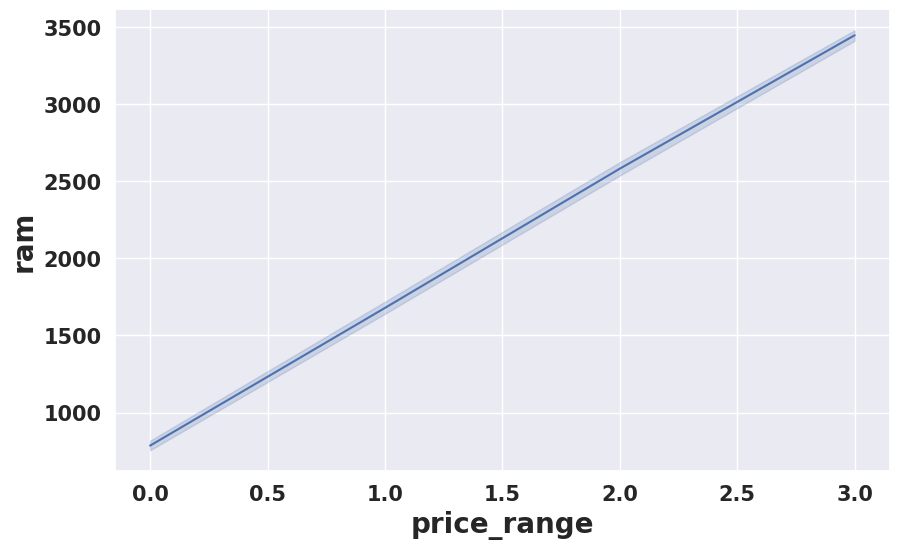

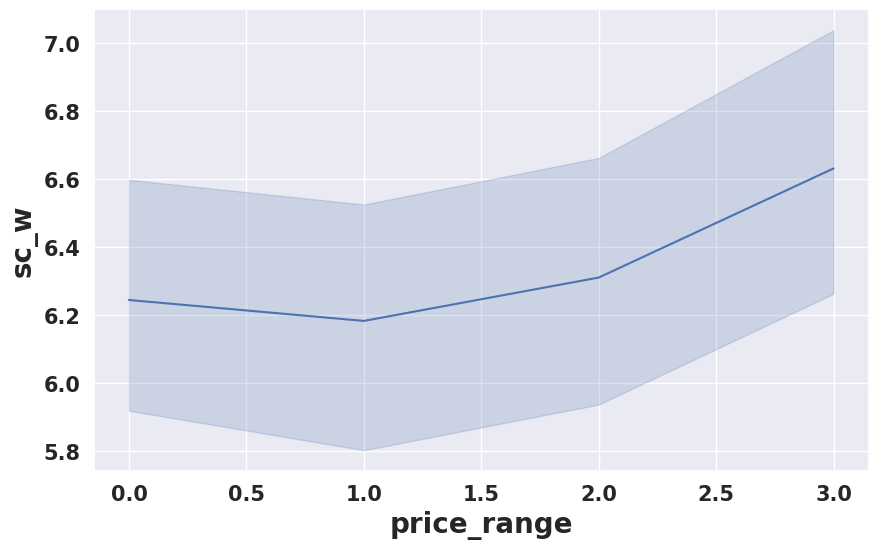

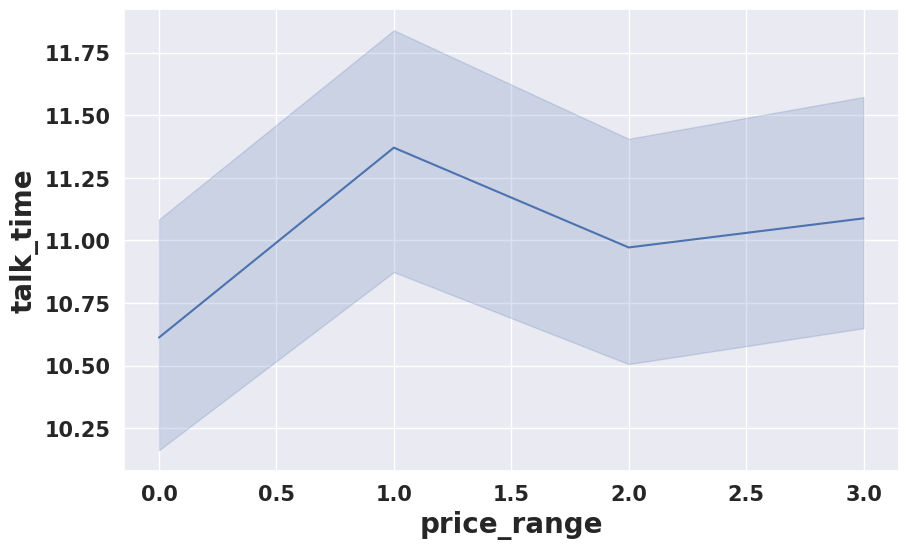

In [ ]:
list_1=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','sc_h','ram','sc_w','talk_time']
# plotting boXplot and distribution
counter=1
for var in list_1:
    plt.figure(figsize=(10,6))

    sns.lineplot(x=mobile_data['price_range'],y=mobile_data[var])


### **Observations**
* ***For class 1 and class2 battery power range is almost similar. As battery power increases price also increases whcih is quite obivious.***
* ***Mobiles in very high price range(Class 3) has less weight compared to other classes.That means as weight of mobiles decrease price increases.***
* ***Mobiles having max screen  height and width falls in very high price category. We can see in linechart of sc_width and sc_height from class 2 screen width and hieght starts increasing with price. Similar case is with px_height and px_width. As resolution of screen increases the price also increases***
***RAM has clear relationship with price range we saw that in correlation matrix also.***

# Mobiles with both 3G and 4G.

In [ ]:
# Mobiles have both 3G and 4G specifications.
three_g_and_4g_df=mobile_data[(mobile_data['three_g']==1) & (mobile_data['four_g']==1)]

In [ ]:
three_g_and_4g_df['price_range'].value_counts()

3.0    274
1.0    261
0.0    259
2.0    247
Name: price_range, dtype: int64

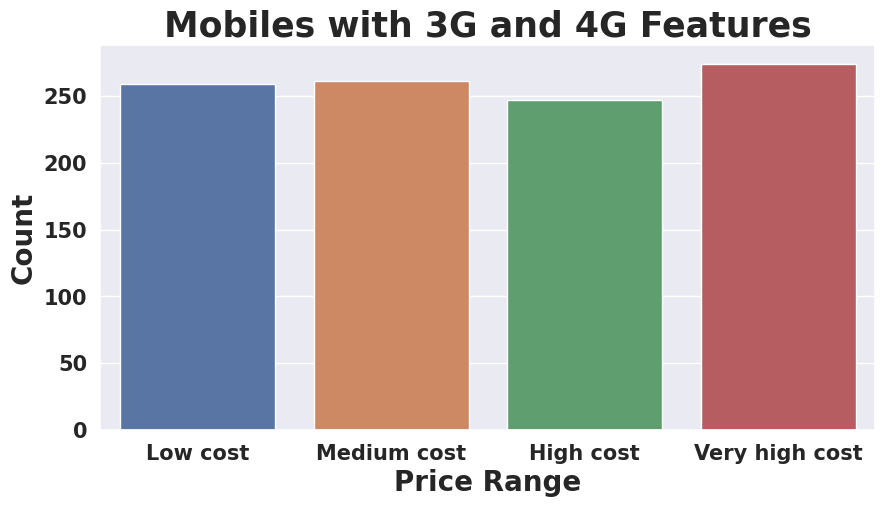

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the DataFrame 'three_g_and_4g_df' with the 'price_range' column

# Define the labels for the price ranges
price_labels = ['Low cost', 'Medium cost', 'High cost', 'Very high cost']

# Plot the count of mobiles for each price range
plt.figure(figsize=(10, 5))
sns.countplot(data=three_g_and_4g_df, x='price_range')
plt.xticks(ticks=[0, 1, 2, 3], labels=price_labels)
plt.title("Mobiles with 3G and 4G Features")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.show()

* As we can see from low cost to very high cost mobiles have both features.

# Mobiles with 3G

In [ ]:
three_g_df=mobile_data[(mobile_data['three_g']==1) & (mobile_data['four_g']!=1)]

In [ ]:
three_g_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2.0
5,1859.0,0.0,0.5,1.0,3.0,0.0,22.0,0.7,164.0,1.0,7.0,1004.0,1654.0,1067.0,17.0,1.0,10.0,1.0,0.0,0.0,1.0
7,1954.0,0.0,0.5,1.0,0.0,0.0,24.0,0.8,187.0,4.0,0.0,512.0,1149.0,700.0,16.0,3.0,5.0,1.0,1.0,1.0,0.0
8,1445.0,1.0,0.5,0.0,0.0,0.0,53.0,0.7,174.0,7.0,14.0,386.0,836.0,1099.0,17.0,1.0,20.0,1.0,0.0,0.0,0.0
12,1815.0,0.0,2.8,0.0,2.0,0.0,33.0,0.6,159.0,4.0,17.0,607.0,748.0,1482.0,18.0,3.0,2.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,1829.0,1.0,2.1,0.0,8.0,0.0,59.0,0.1,91.0,5.0,15.0,1457.0,1919.0,3142.0,16.0,6.0,5.0,1.0,1.0,1.0,3.0
1990,674.0,1.0,2.9,1.0,1.0,0.0,21.0,0.2,198.0,3.0,4.0,576.0,1809.0,1180.0,6.0,3.0,4.0,1.0,1.0,1.0,0.0
1991,1467.0,1.0,0.5,0.0,0.0,0.0,18.0,0.6,122.0,5.0,0.0,888.0,1099.0,3962.0,15.0,11.0,5.0,1.0,1.0,1.0,3.0
1992,858.0,0.0,2.2,0.0,1.0,0.0,50.0,0.1,84.0,1.0,2.0,528.0,1416.0,3978.0,17.0,16.0,3.0,1.0,1.0,0.0,3.0


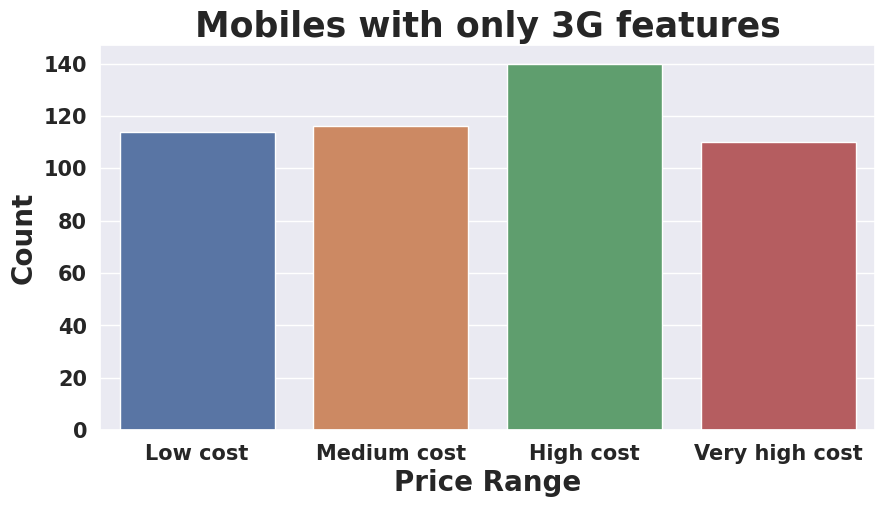

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=three_g_df, x='price_range')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Low cost', 'Medium cost', 'High cost', 'Very high cost'])
plt.title("Mobiles with only 3G features")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.show()


Observations:

* Mobiles which has very high cost are very less likely to have 3G.
* There are more chances that high cost mobile will have 3G in it.

# Mobiles not having 3G or 4G.

In [ ]:
No_3g_4G_df=mobile_data[(mobile_data['three_g']!=1) & (mobile_data['four_g']!=1)]

In [ ]:
No_3g_4G_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1.0
10,769.0,1.0,2.9,1.0,0.0,0.0,9.0,0.1,182.0,5.0,1.0,248.0,874.0,3946.0,5.0,2.0,7.0,0.0,0.0,0.0,3.0
19,682.0,1.0,0.5,0.0,4.0,0.0,19.0,1.0,121.0,4.0,11.0,902.0,1064.0,2337.0,11.0,1.0,18.0,0.0,1.0,1.0,1.0
22,1949.0,0.0,2.6,1.0,4.0,0.0,47.0,0.3,199.0,4.0,7.0,407.0,822.0,1433.0,11.0,5.0,20.0,0.0,0.0,1.0,1.0
30,1579.0,1.0,0.5,1.0,0.0,0.0,5.0,0.2,88.0,7.0,9.0,1358.0,1739.0,3532.0,17.0,11.0,12.0,0.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,1454.0,0.0,2.6,0.0,8.0,0.0,6.0,0.4,199.0,3.0,20.0,698.0,1018.0,1300.0,10.0,9.0,2.0,0.0,0.0,1.0,1.0
1980,1784.0,0.0,1.6,0.0,4.0,0.0,41.0,0.4,164.0,6.0,20.0,610.0,1437.0,2313.0,14.0,1.0,11.0,0.0,1.0,0.0,2.0
1981,1262.0,0.0,1.8,1.0,12.0,0.0,34.0,0.1,149.0,5.0,16.0,223.0,737.0,3248.0,13.0,3.0,4.0,0.0,1.0,1.0,2.0
1986,1547.0,1.0,2.9,0.0,2.0,0.0,57.0,0.4,114.0,1.0,3.0,347.0,957.0,1620.0,9.0,2.0,19.0,0.0,1.0,1.0,1.0


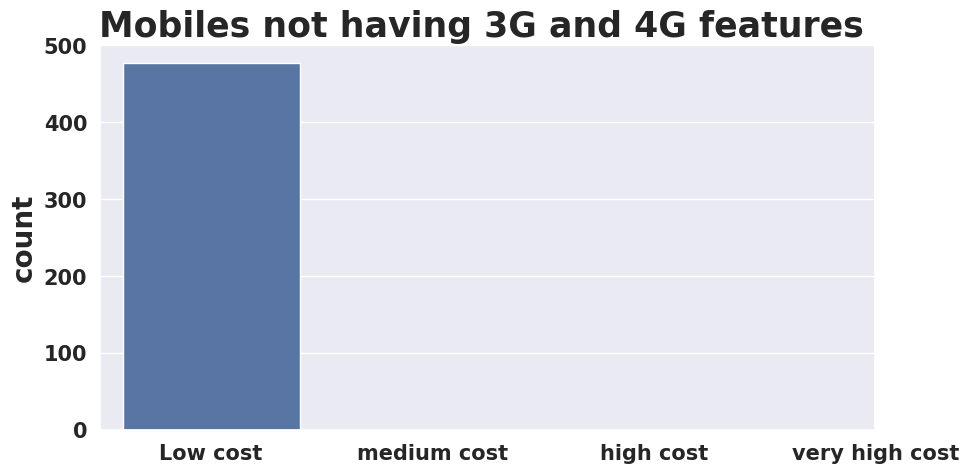

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(No_3g_4G_df['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles not having 3G and 4G features ")
plt.show()

* Its very obvious that low cost mobiles will not have 3G and 4G.
* Mobiles with very high cost may have 5G. As we know technologies are changes everytime.

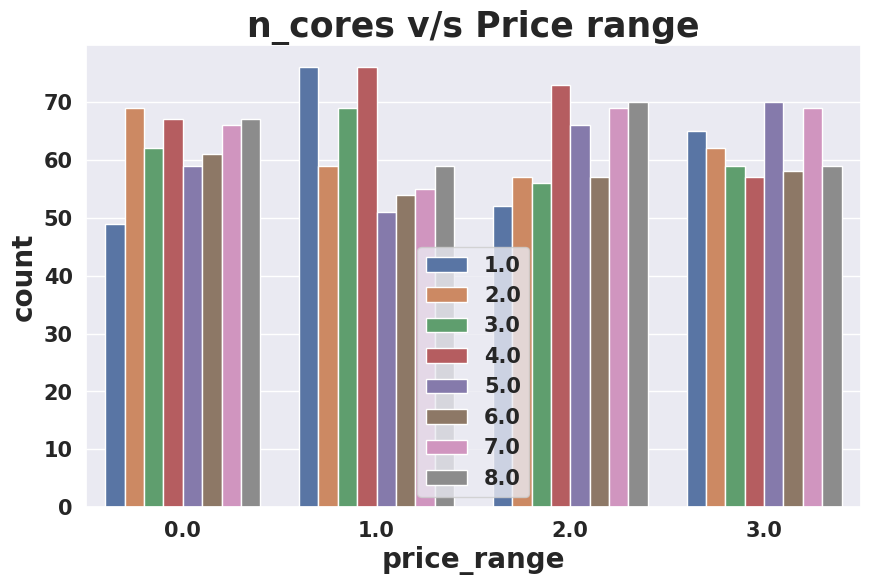

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='price_range', hue='n_cores', data=mobile_data)
plt.title("n_cores v/s Price range")
plt.legend(loc='best')
plt.show()

Observations:
* Price range 0 has majority of phones with 2 core processors
* Price range 1 has majority of phones with 1 and 4 core processors
* Price range 2 has majority of phones with 4 core processors
* Price range 3 has majority of phones with 5 and 7 core processors

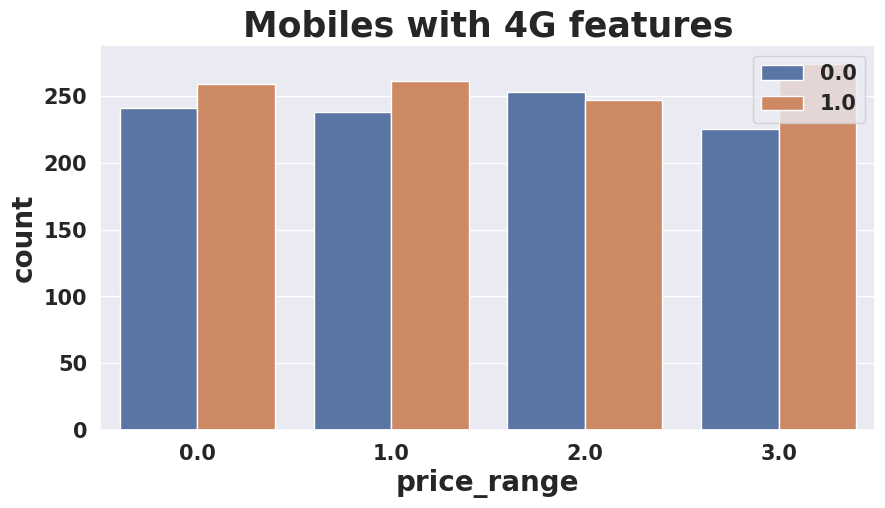

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=mobile_data, x='price_range', hue='four_g')
plt.title("Mobiles with 4G features")
plt.legend(loc='best')
plt.show()

Majority of phones of only price range 2 dont have 4G service.

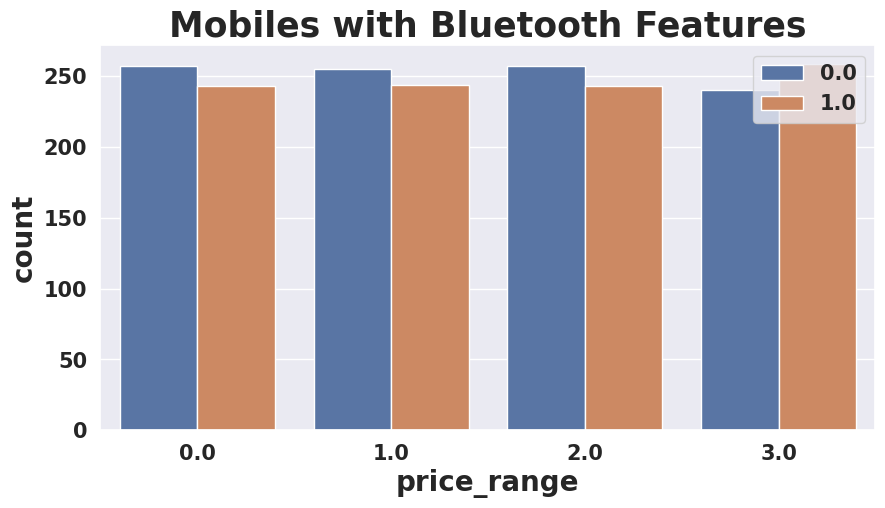

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='price_range', hue='blue', data=mobile_data)
plt.title("Mobiles with Bluetooth Features")
plt.legend(loc='best')
plt.show()


Majority of phones of price range from 0 to 2 dont have bluetooth on other hand price range of 3 have bluetooth service.

# Let's Check the distribution of numerical columns and Outliers.

In [ ]:
mobile_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# numeric col list
numeric_col=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height',
             'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',]

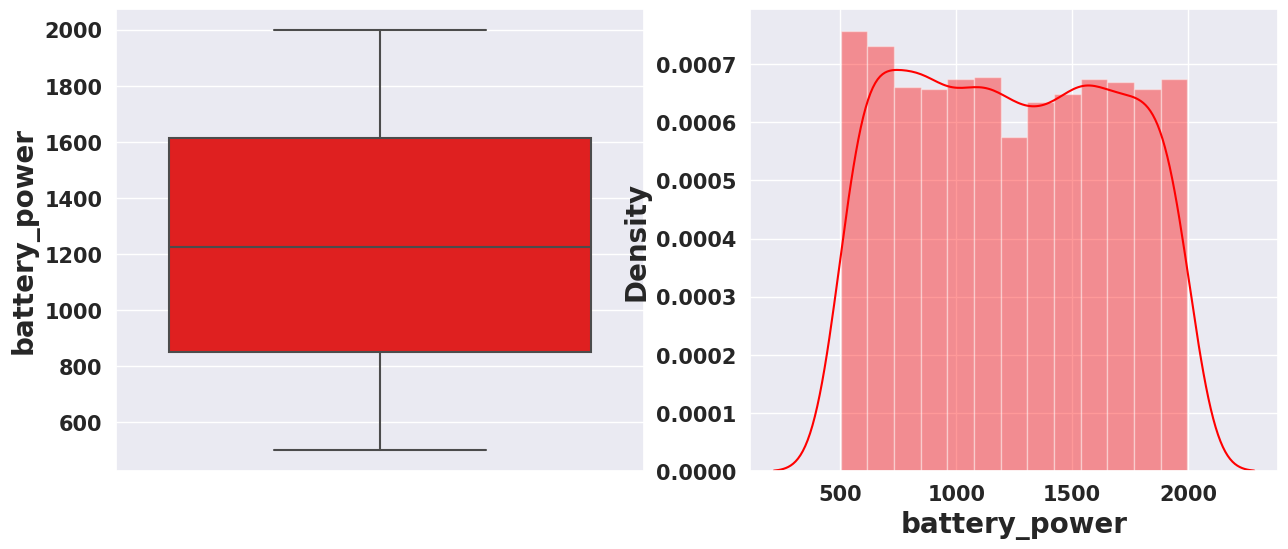

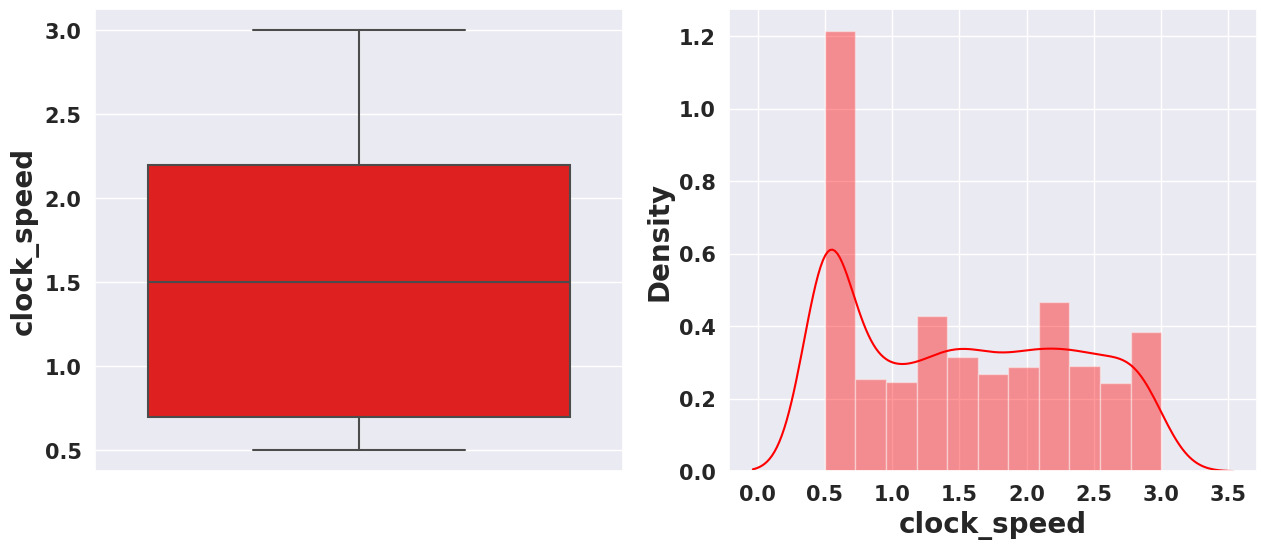

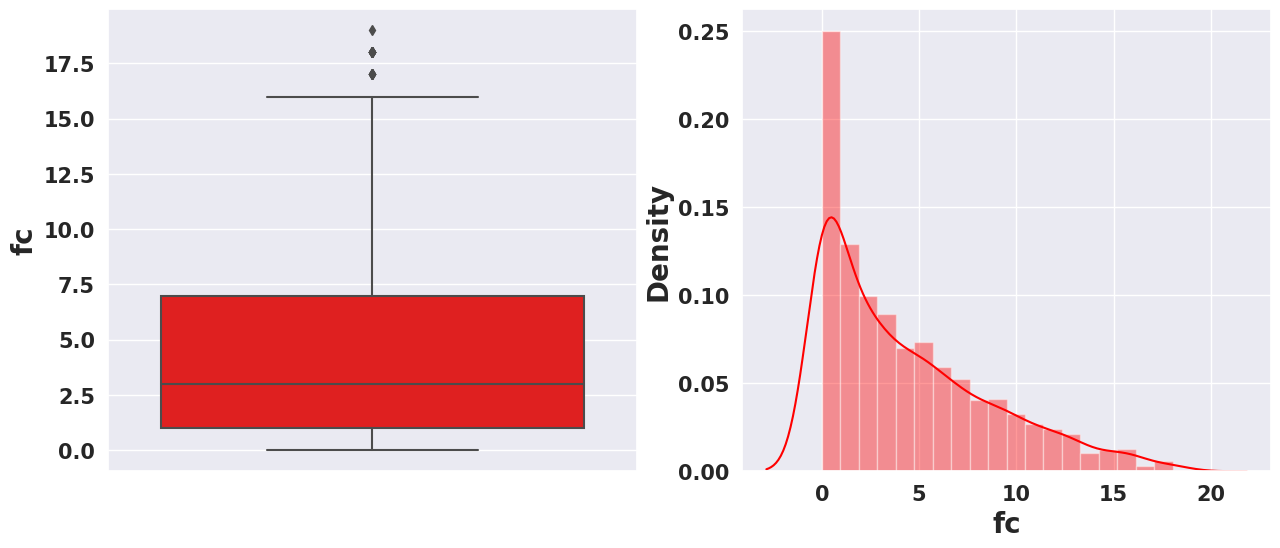

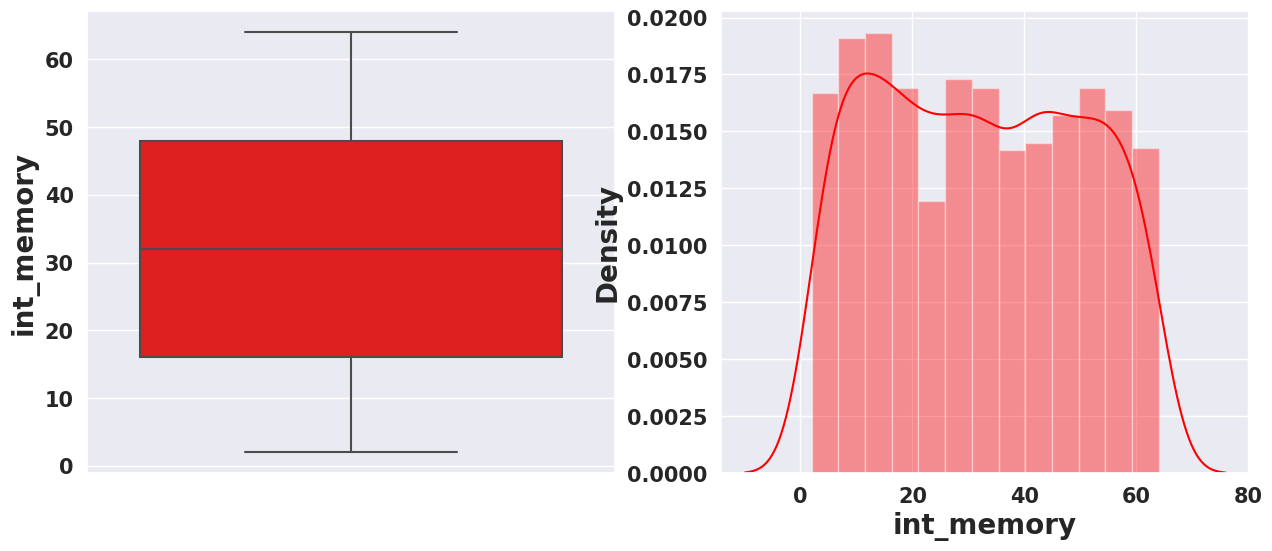

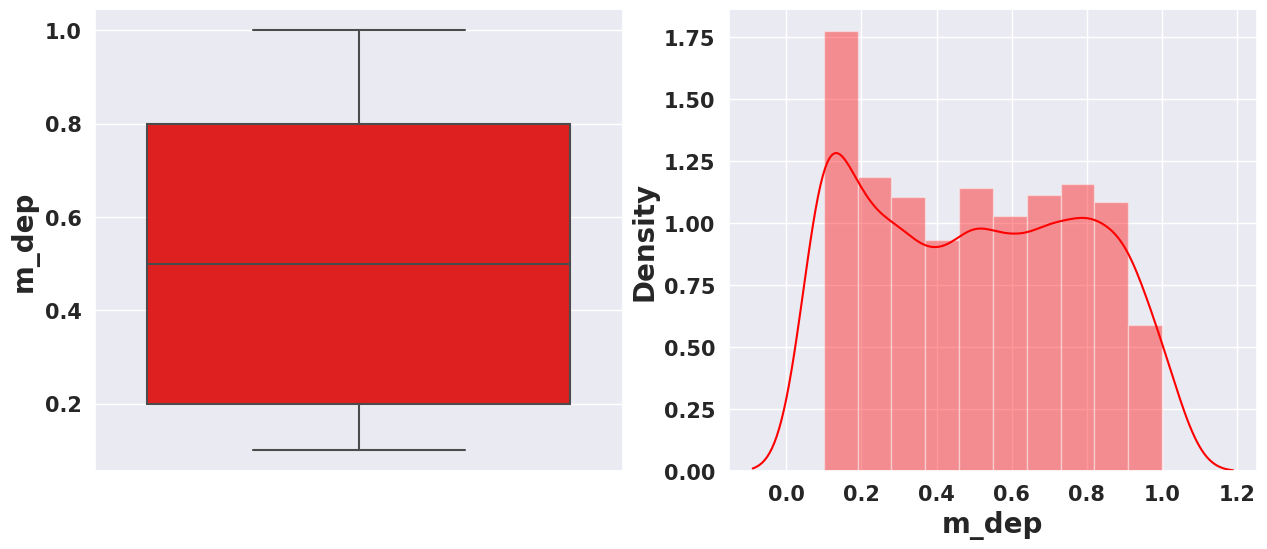

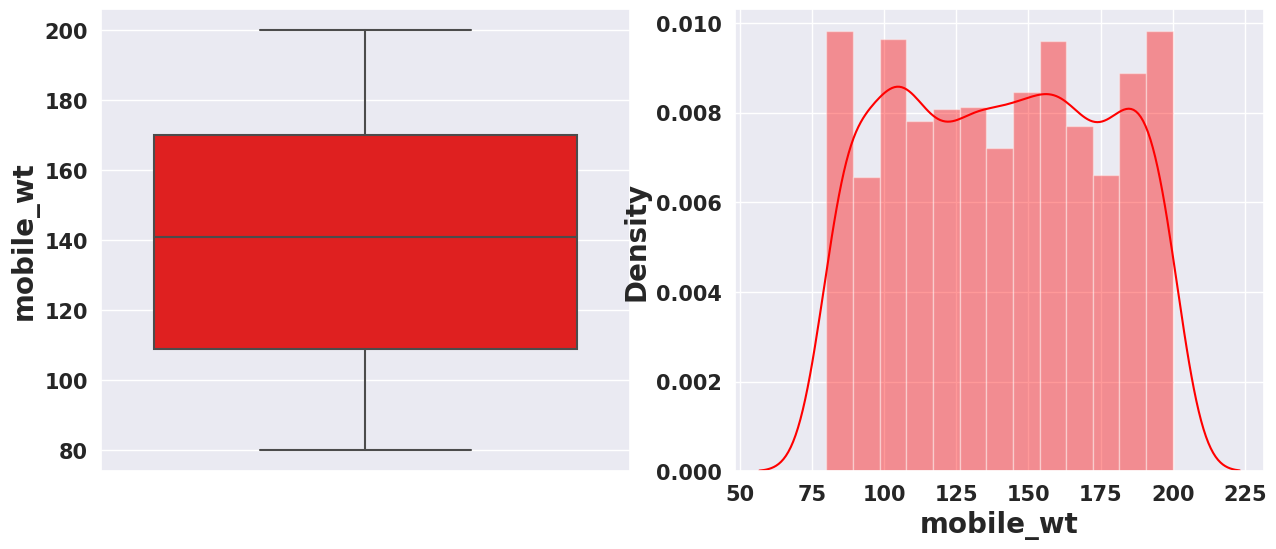

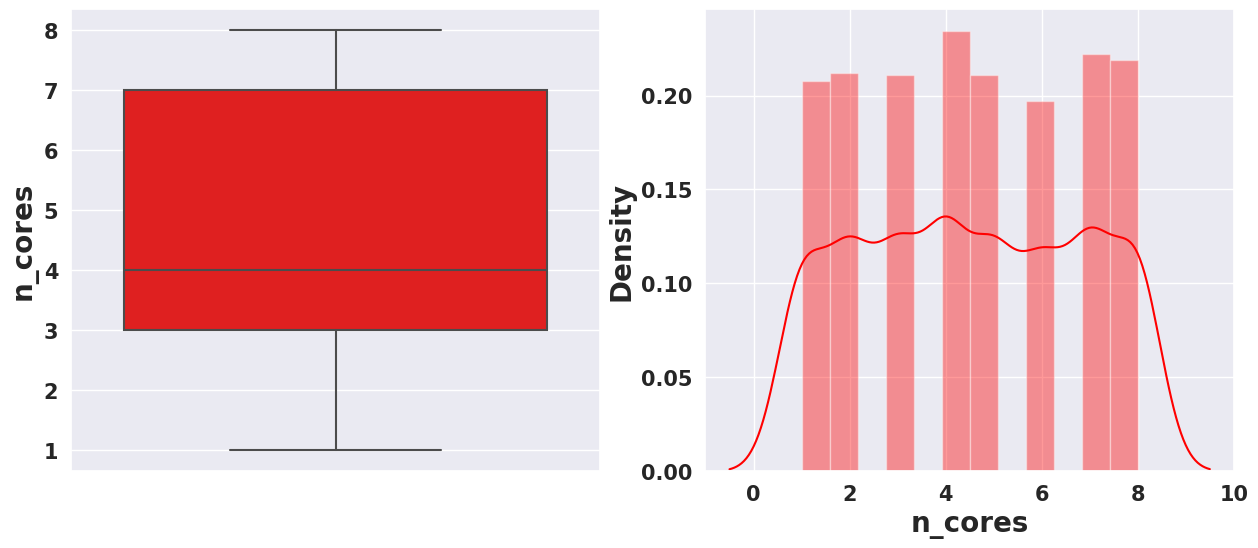

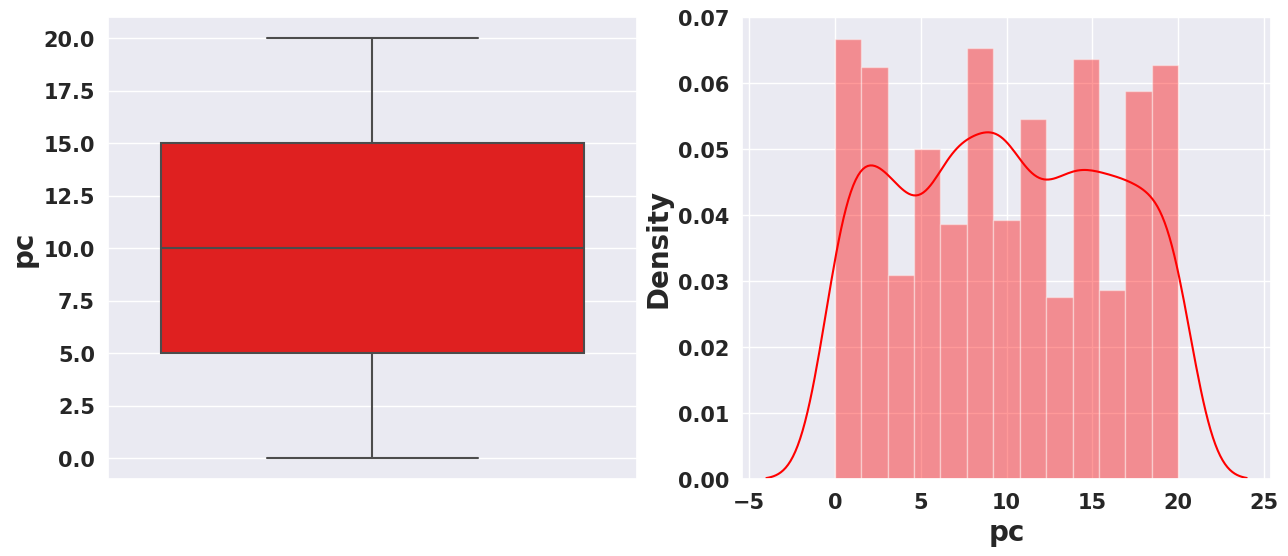

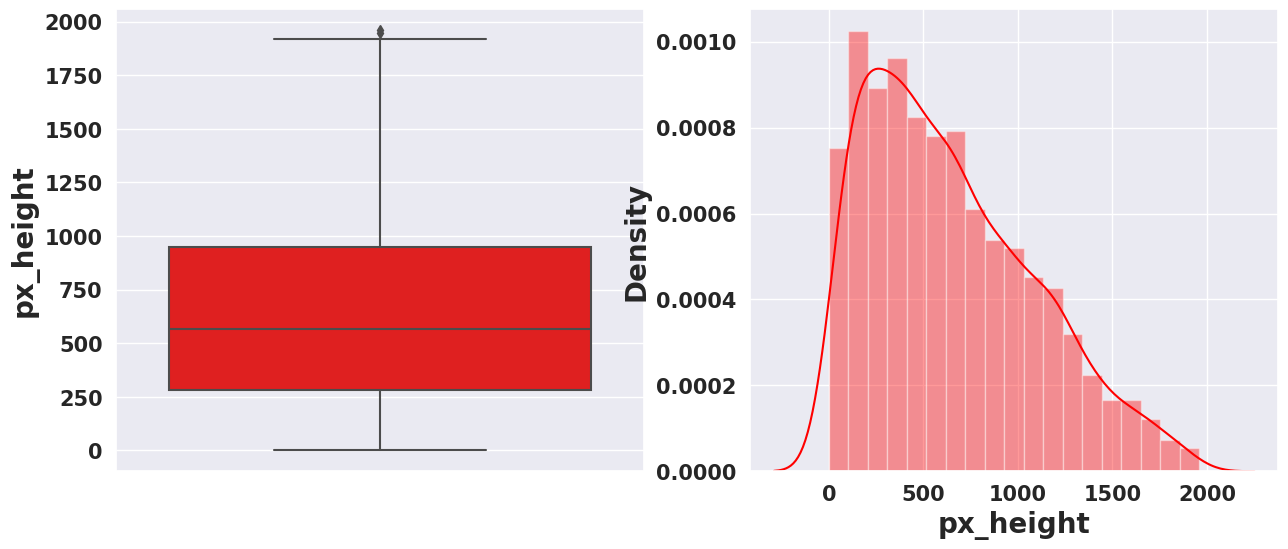

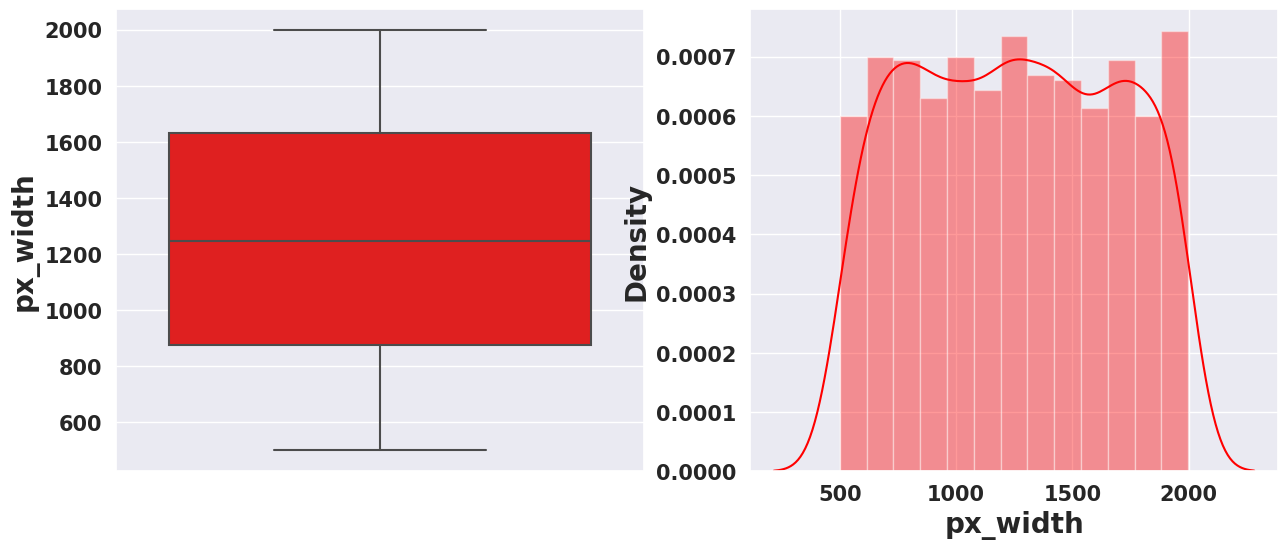

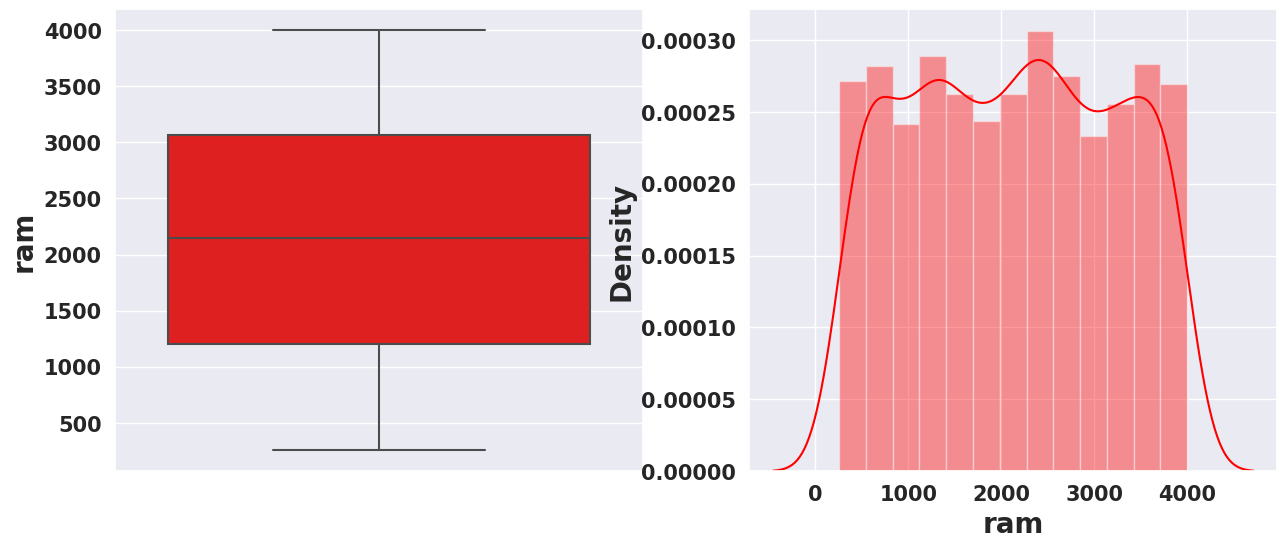

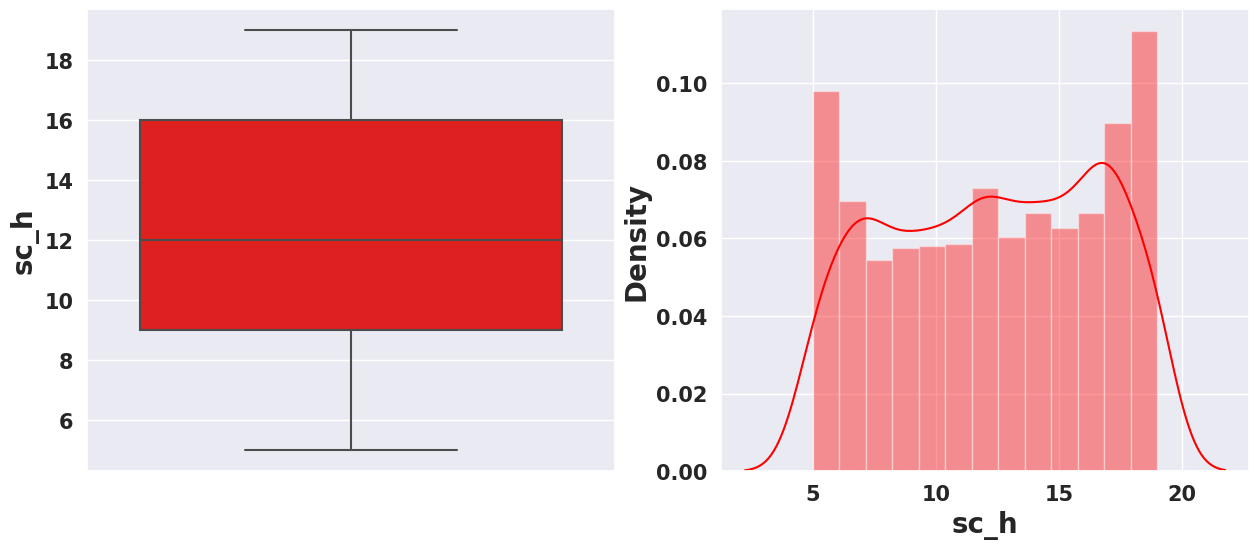

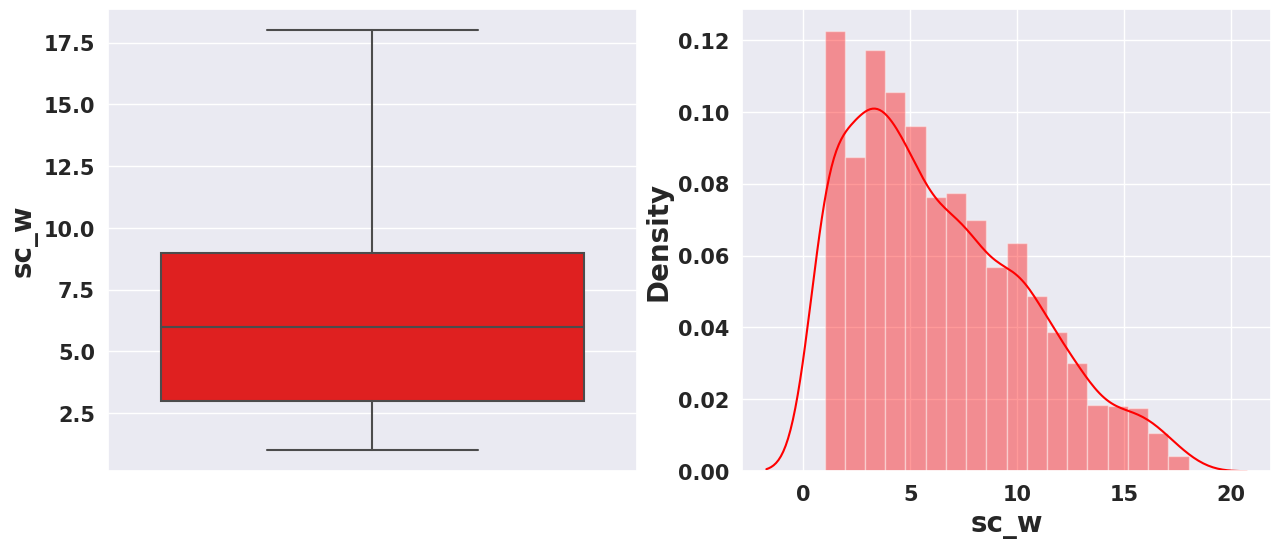

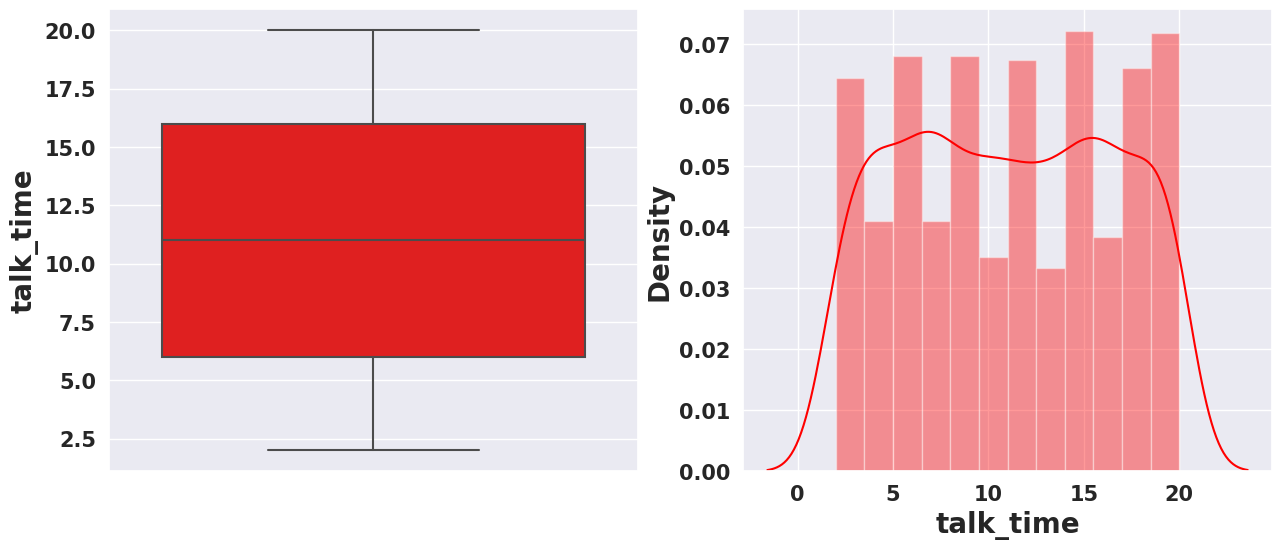

In [ ]:
# plotting boXplot and distribution
for var in numeric_col:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=mobile_data[var],color='red')
    fig.set_title('')
    fig.set_ylabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.distplot(mobile_data[var],color='red')

    fig.set_xlabel(var)

    plt.show()

* Data is well distrubted.
* fc and px_height has some outliers.

# Outlier Treatment.

In [ ]:
Q1 = mobile_data["fc"].quantile(0.25)
Q3 = mobile_data['fc'].quantile(0.991)
IQR = Q3-Q1

# Outliers are present after Quartile 3. so we will take datapoints before Q3.
mobile_data = mobile_data[(mobile_data['fc'] <= Q3)]

In [ ]:

Q1 = mobile_data["px_height"].quantile(0.25)
Q3 = mobile_data['px_height'].quantile(0.991)
IQR = Q3-Q1
# Outliers are present after Quartile 3. so we will take datapoints before Q3.
mobile_data = mobile_data[(mobile_data['px_height'] <= Q3)]

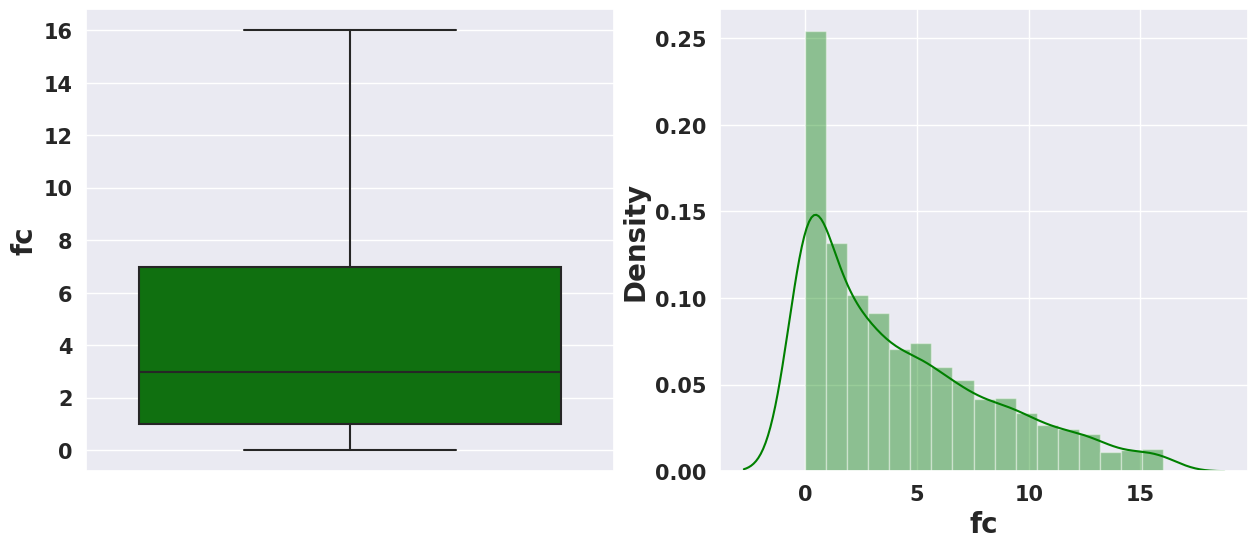

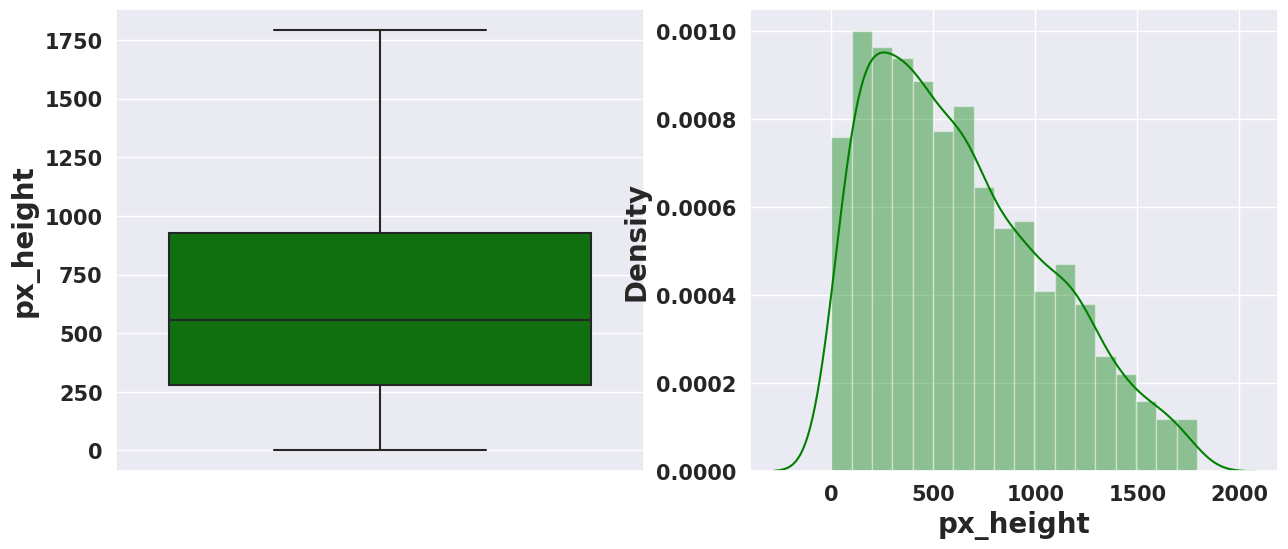

In [ ]:
# Visualising whether oultliers are removed or not.
for var in ['fc','px_height']:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=mobile_data[var],color='green')
    fig.set_title('')
    fig.set_ylabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.distplot(mobile_data[var],color='green')

    fig.set_xlabel(var)

    plt.show()

Thus we can see in box plot no oultiers are present.

In [ ]:
mobile_data.shape

(1962, 21)

#SO we have handled Outliers.

In [ ]:
# create copy of mobile_data
mobile_data_df=mobile_data.copy()

# Feature Selection

In [ ]:
# checking newly created column.
mobile_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1.0
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,2.0
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,2.0
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2.0
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0,1.0


In [ ]:
# # create new colom screen size.
# mobile_data['screen_size']= round(np.sqrt(mobile_data['sc_h']**2+mobile_data['sc_w']**2)/2.54,2)

In [ ]:
# mobile_data['Pixels']=mobile_data['px_height']*mobile_data['px_width']

In [ ]:
# mobile_data.drop(columns=["sc_h",'sc_w','px_height','px_width'],axis=1,inplace=True)

<Axes: >

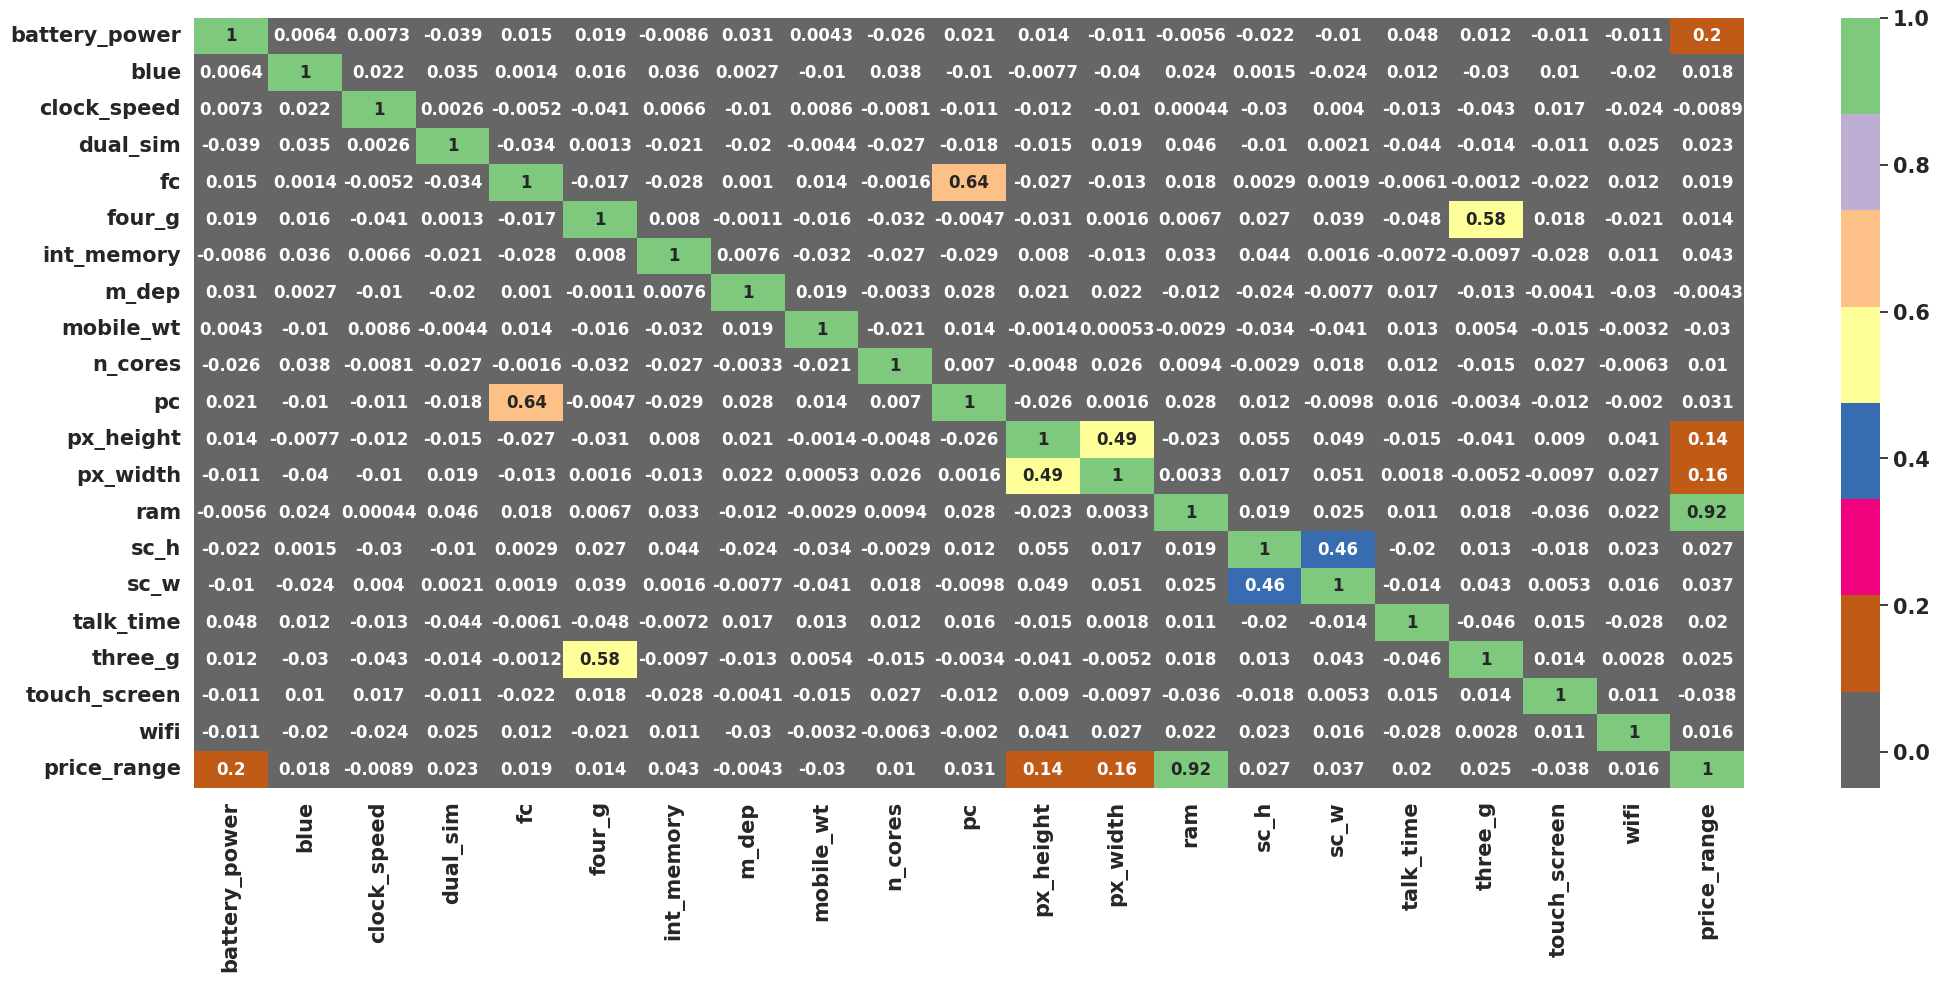

In [ ]:
corr= mobile_data.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True, cmap=plt.cm.Accent_r)

In [ ]:
# Separating X variables(indpendent variables) and Y(dependent variable) variable.
X=mobile_data.drop('price_range',axis=1)
y=mobile_data["price_range"]

In [ ]:
# from sklearn.feature_selection import mutual_info_classif
# # determine the mutual information
# mutual_info = mutual_info_classif(X, y)
# mutual_info

In [ ]:
# mutual_info = pd.Series(mutual_info)
# mutual_info.index = X.columns
# mutual_info.sort_values(ascending=False)

In [ ]:
# #let's plot the ordered mutual_info values per feature
# mutual_info.sort_values(ascending=False).plot.bar(figsize=(10 ,8))
# plt.ylabel('Mutual Information values')
# plt.xlabel('Features')
# plt.title('mutual_info values per feature')

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
#No we Will select the  top 12 important features
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(X,y)


In [ ]:
# creating score's and coolumn's dataframe
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
# conacatenating above two dataframes
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']